# Business Case Study: Yulu Hypethesis Testing
**Author:** Debojit Gogoi.

**EMail:** debojitgogoi.blr@gmail.com

**Dataset:** Limited access

**Business problem definition:**

The company wants to know:
* Which variables are significant in predicting the demand for shared electric
cycles in the Indian market?
* How well those variables describe the electric cycle demands

**Declaration:** This dataset does not belong to the author. The author only wants to use the dataset and create insights using opensource tools. The aim of this experiment is learning and no other business motives are addressed.


**This document contains**

1. Introduction: Problem Statement
2. Dataset preparation: Observations on dataset
3. Exploratory analysis
4. Univariate Analysis
5. Bivariate Analysis
6. 2 Sample T-Test
7. ANOVA Test
8. Chi-square Test
9. Business Insights
10. Recommendations

**About:**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!


# 1. Introduction: Problem Statement

**1.1 Business problem:**

Yulu, India’s leading micro-mobility service provider, offers unique vehicles for daily commutes, aiming to eliminate traffic congestion through shared, solo, and sustainable commuting solutions. Despite its innovative approach and widespread presence in metro stations, bus stands, office spaces, and residential areas, Yulu has recently experienced significant dips in its revenues.

**1.2 Expectations and Objectives:**

Yulu has contracted a consulting firm to understand the factors affecting the demand for their shared electric cycles in the Indian market. Specifically, they want to know:

* Which variables are significant in predicting the demand for shared electric
cycles in the Indian market?
* How well those variables describe the electric cycle demands

**1.3 Dataset Overview**

The dataset provided by Yulu contains various features that could potentially influence the demand for shared electric cycles. Here are the columns and their descriptions:

* **datetime**: The date and time of the record.
* **season**: The season (1: spring, 2: summer, 3: fall, 4: winter).
* **holiday**: Whether the day is a holiday or not (0: no, 1: yes).
* **workingday**: Whether the day is a working day (1: yes, 0: no).
* **weather**: Weather condition (1: clear, 2: mist, 3: light rain/snow, 4: heavy rain/snow).
* **temp**: Temperature in Celsius.
* **atemp**: Feeling temperature in Celsius.
* **humidity**: Humidity level.
* **windspeed**: Wind speed.
* **casual**: Count of casual users.
* **registered**: Count of registered users.
* **count**: Total count of rental bikes (sum of casual and registered users).

**Basic Metric Analysis**

To begin understanding the dataset we shart with descriptive statistics and data profiling.

# 2. Dataset preparation: Observatons on the dataset

* Load the dataset.
* Understand the structure of the dataset, including column names and data types.
* Check for missing values and handle them appropriately.
* List item

In [87]:
# import the required libraries for our exploration
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

**2.1: Load the dataset**

In [88]:
# import the dataset
!wget 'bike_sharing.csv' -O yulu.csv

--2024-05-27 15:46:25--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.161.226, 13.224.161.81, 13.224.161.147, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.161.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘yulu.csv’

yulu.csv            100%[===================>] 633.16K  1.65MB/s    in 0.4s    

2024-05-27 15:46:26 (1.65 MB/s) - ‘yulu.csv’ saved [648353/648353]



In [89]:
df = pd.read_csv('yulu.csv')

**2.2 Understanding the structure of the dataset including column names and data types**

In [90]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [91]:
df.tail()

datetime  season  holiday  workingday  weather   temp  \
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

In [92]:
df.shape

(10886, 12)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Observations:**

* There are 10886 rows and 12 columns.
* The datatypes are a mix of object, integer and float values.
* For our calculations we shall later change the dtype of datetime from object to datetime.


**2.3 Descriptive statistics**

In [94]:
# check the total holidays provided
total_records = len(df)
holiday_records = len(df[df['holiday'] == 1]) # actual count of holidays
holiday_percentage = (holiday_records / total_records) * 100
print(total_records, holiday_records, holiday_percentage)
# this calculation will take time. Its best to describe the data and analyze

10886 311 2.856880396839978


In [95]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

**Observations:**

* **Season**: The data is well-distributed across the four seasons.
* **Holiday**: Only a small portion of the data (approximately 2.9%) represents holidays.
* **Workingday**: Around 68% of the data represents working days.
* **Weather**: Most records are in weather condition 1 (clear) and condition 2 (mist).
* **Temperature**: The average temperature is around 20.3°C, with a range from 0.82°C to 35.3°C.
* **Feeling Temperature**: The average perceived temperature is higher than the actual temperature, at approximately 23.7°C.
* **Humidity**: The average humidity level is around 61.9%, with significant variation, reaching max at 100%.
* **Windspeed**: Wind speeds vary widely, with an average of 12.8 km/h.
* **Casual Users**: The number of casual users ranges from 0 to 367, with an average of 36.
* **Registered Users**: The number of registered users ranges from 0 to 886, with an average of 151.
* **Total Count**: The total number of rentals ranges from 1 to 977, with an average of 191.

**2.4 Missing Values and Renaming Values for better visualization**

In [96]:
# datatype and missing values
print(df.dtypes)
print(df.isnull().sum())
df['datetime'] = pd.to_datetime(df['datetime']) # convert object to datetime
print(df.dtypes)
# clone dataframe for future calculation
df_copied = df.copy()
# map seasons to 4 seasons of the year
season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df['season'] = df['season'].map(season_map)
# map holidays to 'Holiday' and 'Workday'
holiday_map = {1: 'Holiday', 0: 'Workday'}
df['holiday'] = df['holiday'].map(holiday_map)
# map weather to 1: clear, 2: mist, 3: light rain/snow, 4: heavy rain/snow
weather_map = {1: 'clear', 2: 'mist', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}
df['weather'] = df['weather'].map(weather_map)

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


**Observations:**

* The datetime object needs to be changed to actual datetime object.
* There are no missing values in the dataset.

# 3. EDA: Univariate Analysis

**3.1 Outlier treatment**


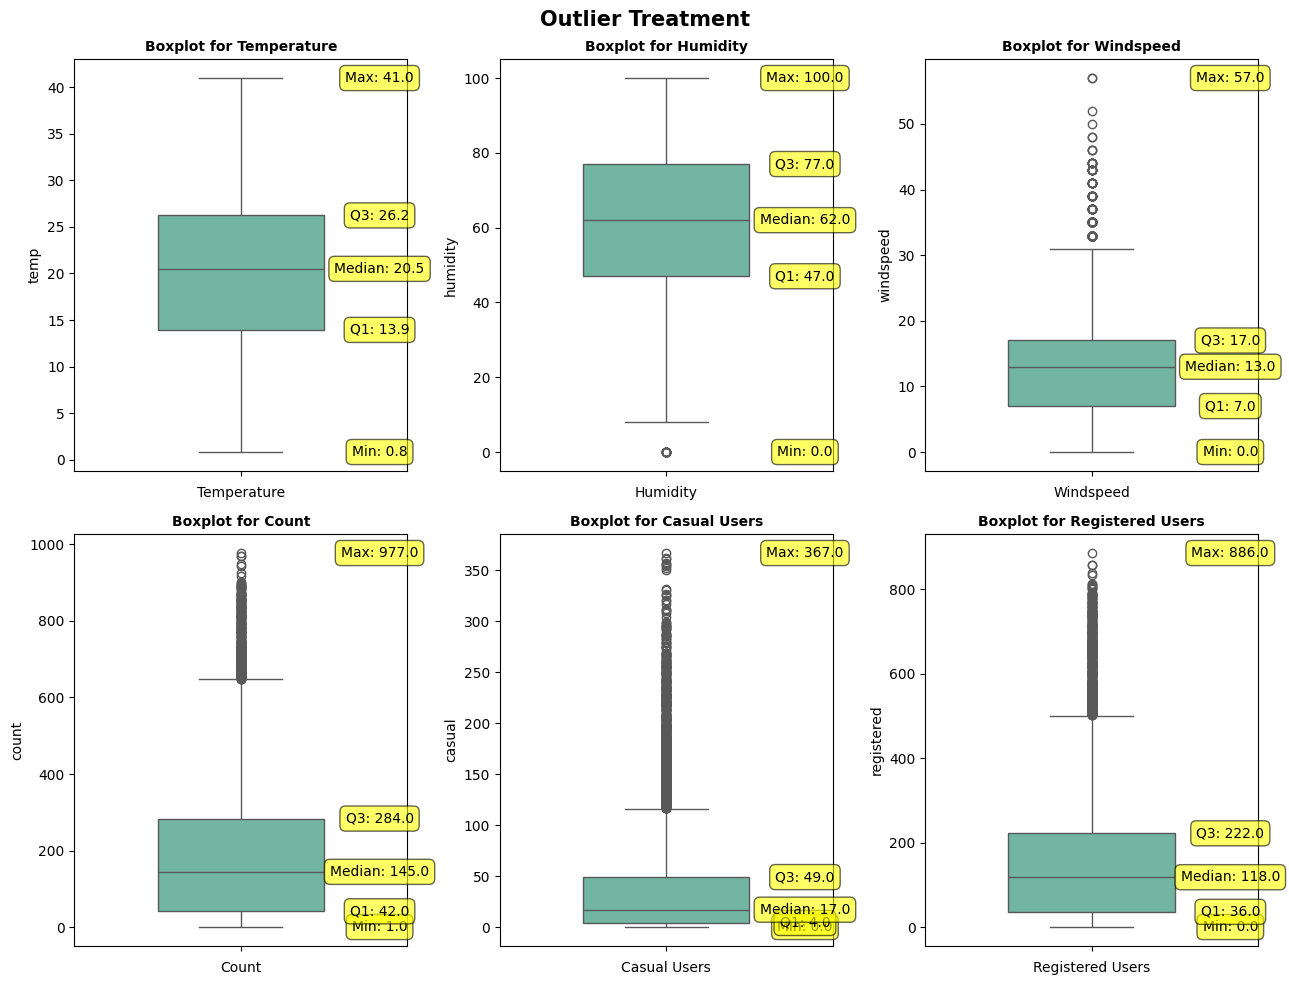

In [97]:
# create figure and subplots manually
fig = plt.figure(figsize=(13, 10))
fig.suptitle('Outlier Treatment', fontsize=15, fontweight='bold')

# function to annotate boxplot with statistical values
def annotate_boxplot(ax, data):
    min_val = data.min()
    max_val = data.max()
    median_val = data.median()
    q1_val = data.quantile(0.25)
    q3_val = data.quantile(0.75)

    # annotations
    for val, label in zip([min_val, q1_val, median_val, q3_val, max_val], ['Min', 'Q1', 'Median', 'Q3', 'Max']):
        ax.annotate(text=f"{label}: {val:.1f}", xy=(0.5, val), xytext=(-20, 0), textcoords='offset points',
                    ha='center', va='center', fontsize=10, bbox=dict(boxstyle='round,pad=0.4', fc='yellow', alpha=0.6))

# boxplot for temperature
ax1 = fig.add_subplot(231) # plot 1
color_palette = sns.color_palette("Set2")
sns.boxplot(y=df['temp'], data=df, width=0.5, palette=color_palette, ax=ax1)
ax1.set_title('Boxplot for Temperature', fontsize=10, fontweight='bold')
ax1.set_xlabel('Temperature', fontsize=10)
annotate_boxplot(ax1, df['temp']) # add annotations for min, Q1, median, Q3, and max to the boxplot

# boxplot for humidity
ax2 = fig.add_subplot(232) # plot 2
sns.boxplot(y=df['humidity'], data=df, width=0.5, palette=color_palette, ax=ax2)
ax2.set_title('Boxplot for Humidity', fontsize=10, fontweight='bold')
ax2.set_xlabel('Humidity', fontsize=10)
annotate_boxplot(ax2, df['humidity']) # add annotations for min, Q1, median, Q3, and max to the boxplot

# boxplot for windspeed
ax3 = fig.add_subplot(233) # plot 2
sns.boxplot(y=df['windspeed'], data=df, width=0.5, palette=color_palette, ax=ax3)
ax3.set_title('Boxplot for Windspeed', fontsize=10, fontweight='bold')
ax3.set_xlabel('Windspeed', fontsize=10)
annotate_boxplot(ax3, df['windspeed']) # add annotations for min, Q1, median, Q3, and max to the boxplot

# boxplot for count
ax4 = fig.add_subplot(234) # plot 2
sns.boxplot(y=df['count'], data=df, width=0.5, palette=color_palette, ax=ax4)
ax4.set_title('Boxplot for Count', fontsize=10, fontweight='bold')
ax4.set_xlabel('Count', fontsize=10)
annotate_boxplot(ax4, df['count']) # add annotations for min, Q1, median, Q3, and max to the boxplot

# boxplot for casual
ax5 = fig.add_subplot(235) # plot 2
sns.boxplot(y=df['casual'], data=df, width=0.5, palette=color_palette, ax=ax5)
ax5.set_title('Boxplot for Casual Users', fontsize=10, fontweight='bold')
ax5.set_xlabel('Casual Users', fontsize=10)
annotate_boxplot(ax5, df['casual']) # add annotations for min, Q1, median, Q3, and max to the boxplot

# boxplot for registered
ax6 = fig.add_subplot(236) # plot 2
sns.boxplot(y=df['registered'], data=df, width=0.5, palette=color_palette, ax=ax6)
ax6.set_title('Boxplot for Registered Users', fontsize=10, fontweight='bold')
ax6.set_xlabel('Registered Users', fontsize=10)
annotate_boxplot(ax6, df['registered']) # add annotations for min, Q1, median, Q3, and max to the boxplot

#adjusting layout for a better fit
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

**Observations:**

* Temperature and humidity does not seem to have too many outliers. There are either 0 or 1 outlier.
* Windspeed, count, casual users and registered users have a higher number of outliers with casual users containing the highest. Our expectation to have a normal distribution is highly negated by substantial kurtosis.
* We need to treat the outliers by capping them at 99%


**3.2 Outlier Capping**

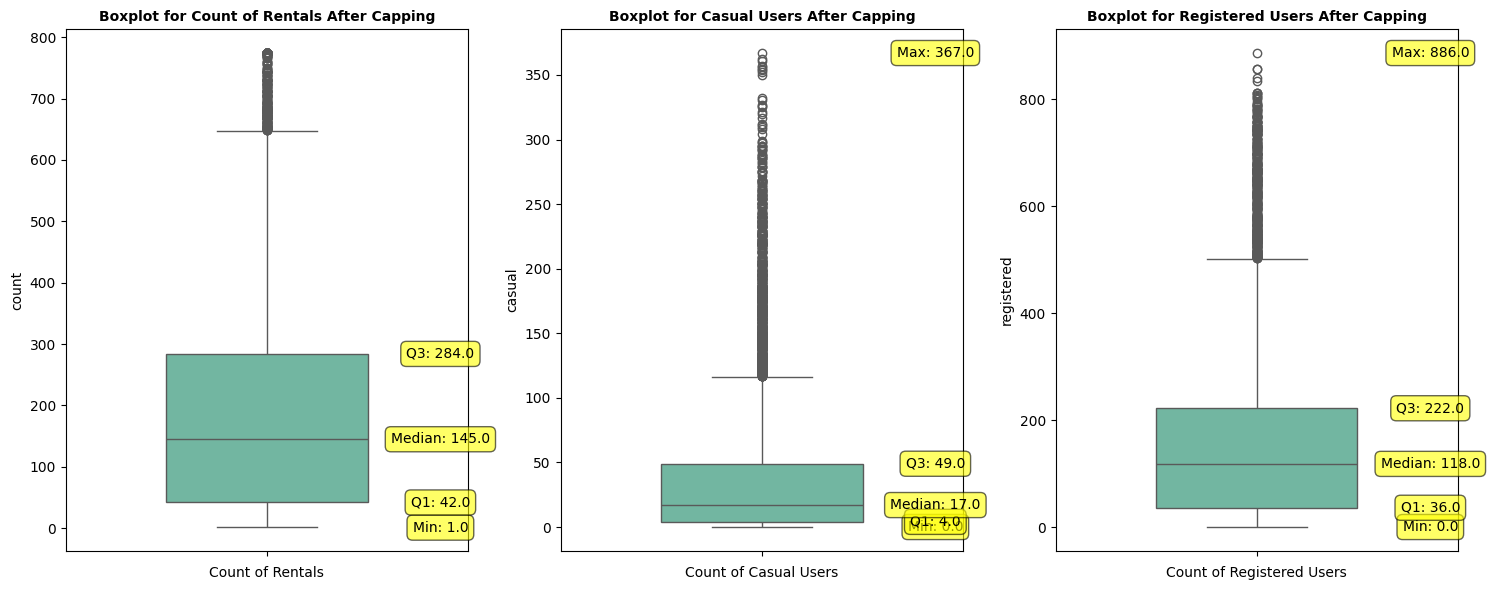

In [98]:
# function to cap outliers at 99%
def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# verify the effect of capping
fig = plt.figure(figsize=(15, 6))
df_capped = cap_outliers(df.copy(), 'count')

# replot count after capping
ax1 = fig.add_subplot(131)
sns.boxplot(y=df_capped['count'], width=0.5, palette=color_palette, ax=ax1)
ax1.set_title('Boxplot for Count of Rentals After Capping', fontsize=10, fontweight='bold')
ax1.set_xlabel('Count of Rentals', fontsize=10)
annotate_boxplot(ax1, df['count'])

# replot casual after capping
ax2 = fig.add_subplot(132)
sns.boxplot(y=df_capped['casual'], width=0.5, palette=color_palette, ax=ax2)
ax2.set_title('Boxplot for Casual Users After Capping', fontsize=10, fontweight='bold')
ax2.set_xlabel('Count of Casual Users', fontsize=10)
annotate_boxplot(ax2, df['casual'])

# replot registered users after capping
ax3 = fig.add_subplot(133)
sns.boxplot(y=df_capped['registered'], width=0.5, palette=color_palette, ax=ax3)
ax3.set_title('Boxplot for Registered Users After Capping', fontsize=10, fontweight='bold')
ax3.set_xlabel('Count of Registered Users', fontsize=10)
annotate_boxplot(ax3, df['registered'])

#adjusting layout for a better fit
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


**3.3 Plots and Observations: NUMERICAL Analysis**

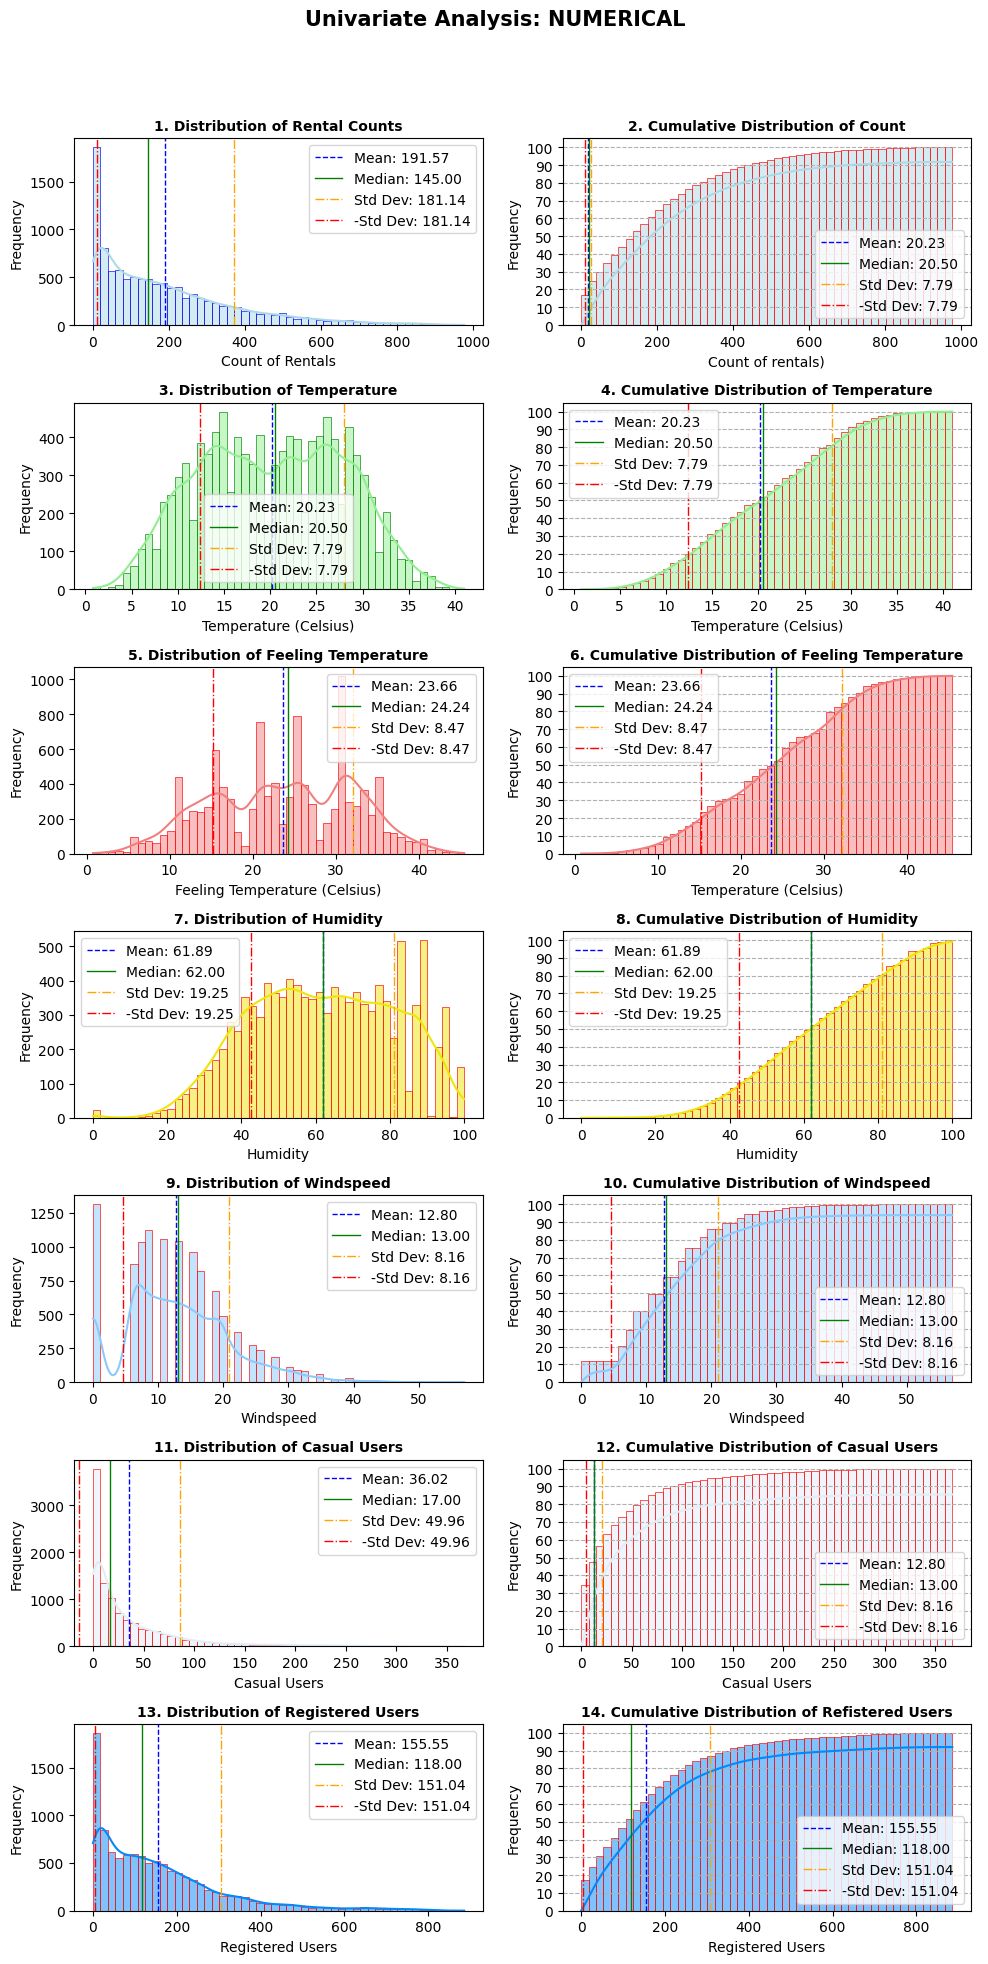

In [99]:
# create the figure and subplots
fig = plt.figure(figsize=(10, 20))
fig.suptitle('Univariate Analysis: NUMERICAL', fontsize=15, fontweight='bold')

# define a function to annotate mean, median, and standard deviation
def add_legend(ax, item):
    # calculate mean, median, std_dev
    mean_val = df[item].mean()
    median_val = df[item].median()
    std_dev = np.round(df[item].std(), 2)

    # add vertical lines for mean, median, and std_dev
    ax.axvline(mean_val, color='blue', linestyle='--', linewidth=1, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='-', linewidth=1, label=f'Median: {median_val:.2f}')
    ax.axvline(mean_val + std_dev, color='orange', linestyle='-.', linewidth=1, label=f'Std Dev: {std_dev:.2f}')
    ax.axvline(mean_val - std_dev, color='red', linestyle='-.', linewidth=1, label=f'-Std Dev: {std_dev:.2f}')

    # add legend
    ax.legend()

# plot 1: Distribution of Rental Counts
ax1 = fig.add_subplot(721)
sns.histplot(df['count'], bins=50, kde=True, color='#add8e6', edgecolor='blue', ax=ax1)
ax1.set_title('1. Distribution of Rental Counts', fontsize=10, fontweight='bold')
ax1.set_xlabel('Count of Rentals', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)
add_legend(ax=ax1, item='count')

# plot 2: Cumulative Distribution of Temperature
ax2 = fig.add_subplot(722)
sns.histplot(df['count'], bins=50, kde=True, color='#add8e6', edgecolor='red', cumulative=True, stat='percent', ax=ax2)
ax2.set_title('2. Cumulative Distribution of Count', fontsize=10, fontweight='bold')
ax2.set_xlabel('Count of rentals)', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
add_legend(ax=ax2, item='temp')

# plot 3: Distribution of Temperature
ax3 = fig.add_subplot(723)
sns.histplot(df['temp'], bins=50, kde=True, color='#90ee90', edgecolor='green', ax=ax3)
ax3.set_title('3. Distribution of Temperature', fontsize=10, fontweight='bold')
ax3.set_xlabel('Temperature (Celsius)', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)
add_legend(ax=ax3, item='temp')

# plot 4: Cumulative Distribution of Temperature
ax4 = fig.add_subplot(724)
sns.histplot(df['temp'], bins=50, kde=True, color='#90ee90', edgecolor='red', cumulative=True, stat='percent', ax=ax4)
ax4.set_title('4. Cumulative Distribution of Temperature', fontsize=10, fontweight='bold')
ax4.set_xlabel('Temperature (Celsius)', fontsize=10)
ax4.set_ylabel('Frequency', fontsize=10)
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
add_legend(ax=ax4, item='temp')

# plot 5: Distribution of Feeling Temperature
ax5 = fig.add_subplot(725)
sns.histplot(df['atemp'], bins=50, kde=True, color='#f08080', edgecolor='red', ax=ax5)
ax5.set_title('5. Distribution of Feeling Temperature', fontsize=10, fontweight='bold')
ax5.set_xlabel('Feeling Temperature (Celsius)', fontsize=10)
ax5.set_ylabel('Frequency', fontsize=10)
add_legend(ax=ax5, item='atemp')

# plot 6: Cumulative Distribution of Feeling Temperature
ax6 = fig.add_subplot(726)
sns.histplot(df['atemp'], bins=50, kde=True, color='#f08080', edgecolor='red', cumulative=True, stat='percent', ax=ax6)
ax6.set_title('6. Cumulative Distribution of Feeling Temperature', fontsize=10, fontweight='bold')
ax6.set_xlabel('Temperature (Celsius)', fontsize=10)
ax6.set_ylabel('Frequency', fontsize=10)
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
add_legend(ax=ax6, item='atemp')

# plot 7: Distribution of Humidity
ax7 = fig.add_subplot(727)
sns.histplot(df['humidity'], bins=50, kde=True, color='#ede609', edgecolor='red', ax=ax7)
ax7.set_title('7. Distribution of Humidity', fontsize=10, fontweight='bold')
ax7.set_xlabel('Humidity', fontsize=10)
ax7.set_ylabel('Frequency', fontsize=10)
add_legend(ax=ax7, item='humidity')

# plot 8: Cumulative Distribution of Humidity
ax8 = fig.add_subplot(728)
sns.histplot(df['humidity'], bins=50, kde=True, color='#ede609', edgecolor='red', cumulative=True, stat='percent', ax=ax8)
ax8.set_title('8. Cumulative Distribution of Humidity', fontsize=10, fontweight='bold')
ax8.set_xlabel('Humidity', fontsize=10)
ax8.set_ylabel('Frequency', fontsize=10)
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
add_legend(ax=ax8, item='humidity')

# plot 9: Distribution of Windspeed
ax9 = fig.add_subplot(729)
sns.histplot(df['windspeed'], bins=50, kde=True, color='#8bc9fc', edgecolor='red', ax=ax9)
ax9.set_title('9. Distribution of Windspeed', fontsize=10, fontweight='bold')
ax9.set_xlabel('Windspeed', fontsize=10)
ax9.set_ylabel('Frequency', fontsize=10)
add_legend(ax=ax9, item='windspeed')

# plot 10: Cumulative Distribution of Windspeed
ax10 = fig.add_subplot(7, 2, 10)
sns.histplot(df['windspeed'], bins=50, kde=True, color='#8bc9fc', edgecolor='red', cumulative=True, stat='percent', ax=ax10)
ax10.set_title('10. Cumulative Distribution of Windspeed', fontsize=10, fontweight='bold')
ax10.set_xlabel('Windspeed', fontsize=10)
ax10.set_ylabel('Frequency', fontsize=10)
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
add_legend(ax=ax10, item='windspeed')

# plot 11: Distribution of Casual Users
ax11 = fig.add_subplot(7, 2, 11)
sns.histplot(df['casual'], bins=50, kde=True, color='#e1edf7', edgecolor='red', ax=ax11)
ax11.set_title('11. Distribution of Casual Users', fontsize=10, fontweight='bold')
ax11.set_xlabel('Casual Users', fontsize=10)
ax11.set_ylabel('Frequency', fontsize=10)
add_legend(ax=ax11, item='casual')

# plot 12: Cumulative Distribution of Casual Users
ax12 = fig.add_subplot(7, 2, 12)
sns.histplot(df['casual'], bins=50, kde=True, color='#e1edf7', edgecolor='red', cumulative=True, stat='percent', ax=ax12)
ax12.set_title('12. Cumulative Distribution of Casual Users', fontsize=10, fontweight='bold')
ax12.set_xlabel('Casual Users', fontsize=10)
ax12.set_ylabel('Frequency', fontsize=10)
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
add_legend(ax=ax12, item='windspeed')

# plot 13: Distribution of Registered Users
ax13 = fig.add_subplot(7, 2, 13)
sns.histplot(df['registered'], bins=50, kde=True, color='#0289fa', edgecolor='red', ax=ax13)
ax13.set_title('13. Distribution of Registered Users', fontsize=10, fontweight='bold')
ax13.set_xlabel('Registered Users', fontsize=10)
ax13.set_ylabel('Frequency', fontsize=10)
add_legend(ax=ax13, item='registered')

# plot 14: Cumulative Distribution of Casual Users
ax14 = fig.add_subplot(7, 2, 14)
sns.histplot(df['registered'], bins=50, kde=True, color='#0289fa', edgecolor='red', cumulative=True, stat='percent', ax=ax14)
ax14.set_title('14. Cumulative Distribution of Refistered Users', fontsize=10, fontweight='bold')
ax14.set_xlabel('Registered Users', fontsize=10)
ax14.set_ylabel('Frequency', fontsize=10)
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
add_legend(ax=ax14, item='registered')

# adjusting layout for a better fit
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Observations:**

* The mean and the standard deviation of the temp column is 20.23 and 7.79 degree celcius respectively. More than 80 % of the time, the temperature is less than 28 degrees celcius.
* The mean and the standard deviation of the atemp column is 23.66 and 8.47 degree celcius respectively. More than 70 % of the time, the temperature is less than 28 degrees celcius.
* The mean and the standard deviation of the humidity column is 61.89 and 19.25 respectively. More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.
* More than 85 % of the total windspeed data has a value of less than 20.
* More than 80 % of the time, the count of casual users is less than 60.
* More than 85 % of the time, the count of registered users is less than 300.

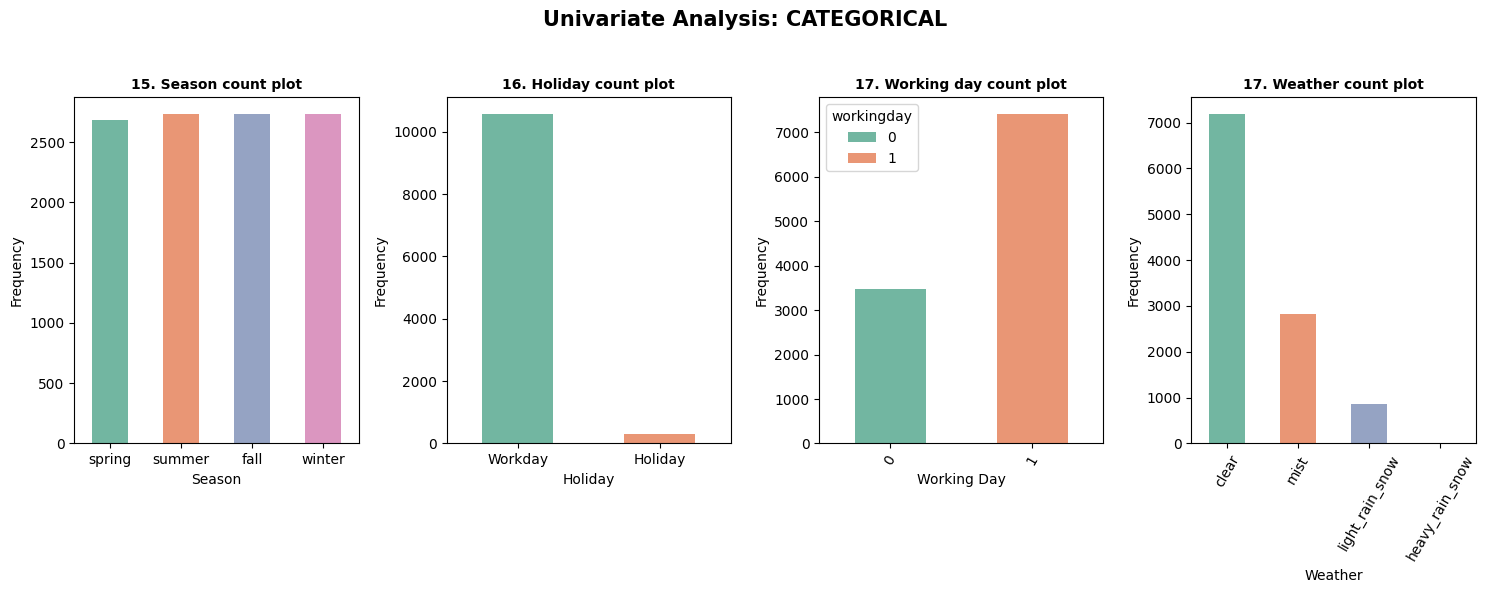

In [100]:
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Univariate Analysis: CATEGORICAL', fontsize=15, fontweight='bold')
# plot 15: Count plot Season
ax1 = fig.add_subplot(141)
sns.countplot(x='season', data=df, palette=color_palette, width=0.5, hue='season', ax=ax1)
ax1.set_title('15. Season count plot', fontsize=10, fontweight='bold')
ax1.set_xlabel('Season', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)

# plot 16: Count plot Holiday
ax2 = fig.add_subplot(142)
sns.countplot(x='holiday', data=df, palette=color_palette, width=0.5, hue='holiday', ax=ax2)
ax2.set_title('16. Holiday count plot', fontsize=10, fontweight='bold')
ax2.set_xlabel('Holiday', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)

# plot 17: Count plot Working Day
ax3 = fig.add_subplot(143)
sns.countplot(x='workingday', data=df, palette=color_palette, width=0.5, hue='workingday', ax=ax3)
ax3.set_title('17. Working day count plot', fontsize=10, fontweight='bold')
ax3.set_xlabel('Working Day', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)
plt.xticks(rotation=60)

# plot 18: Count plot Weather
ax4 = fig.add_subplot(144)
sns.countplot(x='weather', data=df, palette=color_palette, width=0.5, hue='weather', ax=ax4)
ax4.set_title('17. Weather count plot', fontsize=10, fontweight='bold')
ax4.set_xlabel('Weather', fontsize=10)
ax4.set_ylabel('Frequency', fontsize=10)
plt.xticks(rotation=60)

# adjusting layout for a better fit
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Observations**

* The seasons are equally divided amongst the year.
* There has been very few holidays for Yulu.
* Working day is more than a non working day.
* Yulu is mostly used on clear days. Its usage declines during light rain and diminished during heavy rain.

# 4. Bivariate Analysis

**4.1 Basic metric analysis and visualizations**
* To understand the data we shall do a quick top down approach on basic metrics.
* We shall visualize key metrics and analyze the relationship between the dependent valuable (count) and the independent variables.

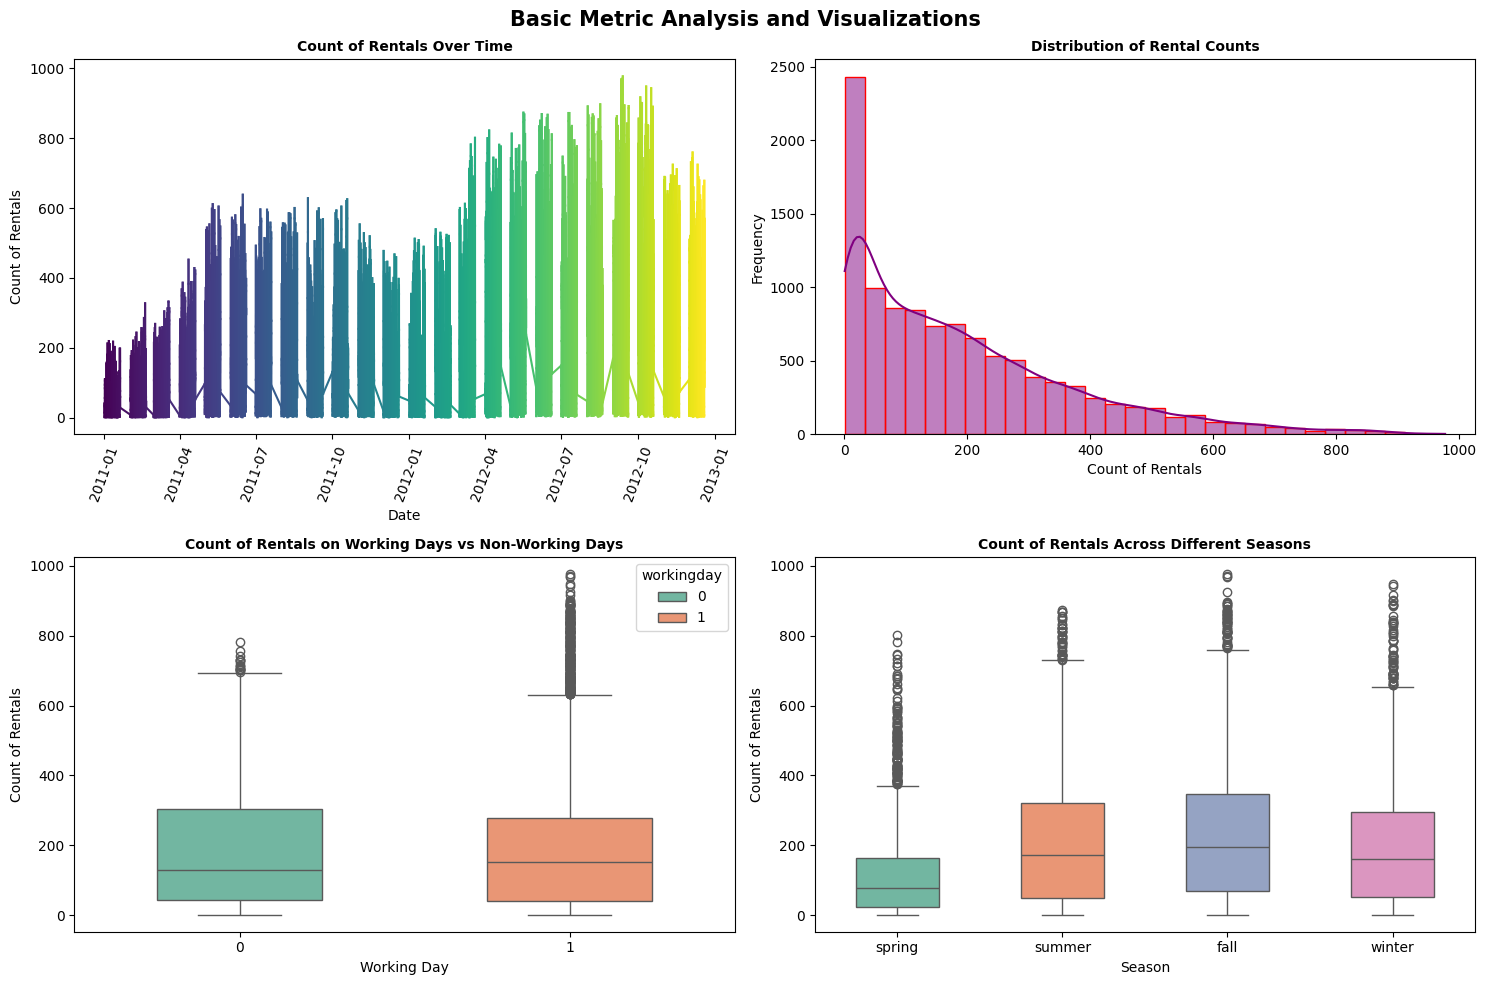

In [101]:
# create figure and subplots manually
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Basic Metric Analysis and Visualizations', fontsize=15, fontweight='bold')

# time series analysis of rental counts
ax1 = fig.add_subplot(221) # plot 1
colors = plt.cm.viridis(np.linspace(0, 1, len(df))) # color map
for i in range(len(df)-1):
    ax1.plot(df['datetime'][i:i+2], df['count'][i:i+2], color=colors[i]) # plot with color
ax1.set_title('Count of Rentals Over Time', fontsize=10, fontweight='bold')
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Count of Rentals', fontsize=10)
plt.xticks(rotation=70)

# distribution of rental counts
ax2 = fig.add_subplot(222) # plot 2
sns.histplot(df['count'], bins=30, kde=True, color='Purple', edgecolor='red', ax=ax2)
ax2.set_title('Distribution of Rental Counts', fontsize=10, fontweight='bold')
ax2.set_xlabel('Count of Rentals', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)

# boxplot for rentals count on working days vs non-working days
ax3 = fig.add_subplot(223) # plot 3
color_palette = sns.color_palette("Set2")
sns.boxplot(x='workingday', y='count', data=df, width=0.5, palette=color_palette, hue='workingday', ax=ax3)
ax3.set_title('Count of Rentals on Working Days vs Non-Working Days', fontsize=10, fontweight='bold')
ax3.set_xlabel('Working Day', fontsize=10)
ax3.set_ylabel('Count of Rentals', fontsize=10)

# boxplot for rentals count across different seasons
ax4 = fig.add_subplot(224) # plot 4
sns.boxplot(x='season', y='count', data=df, width=0.5, palette=color_palette, hue='season', ax=ax4)
ax4.set_title('Count of Rentals Across Different Seasons', fontsize=10, fontweight='bold')
ax4.set_xlabel('Season', fontsize=10)
ax4.set_ylabel('Count of Rentals', fontsize=10)

#adjusting layout for a better fit
plt.tight_layout(rect=[0, 0, 1, 1])

**Obsevations:**

* **Plot1**
>* The plot reveals trends, peaks, and troughs in rental counts over time.
>* We can observe potential seasonality or periodic patterns.
* **Plot2**
>* The histogram shows the frequency distribution of rental counts.
>* The KDE plot provides a smooth estimate of the distribution, revealing potential skewness.
* **Plot3**
>* The boxplot compares rental counts on working days and non-working days.
>* There may be a noticeable difference in rentals between these two categories.
* **Plot4**
>* The boxplot reveals the median, quartiles, and outliers for rental counts in each season.
>* There may be significant differences in rentals across seasons.

From our basic metric analysis, we have gained initial insights into the dataset's structure and characteristics.

**4.2 Comprehensive bivariate analysis**

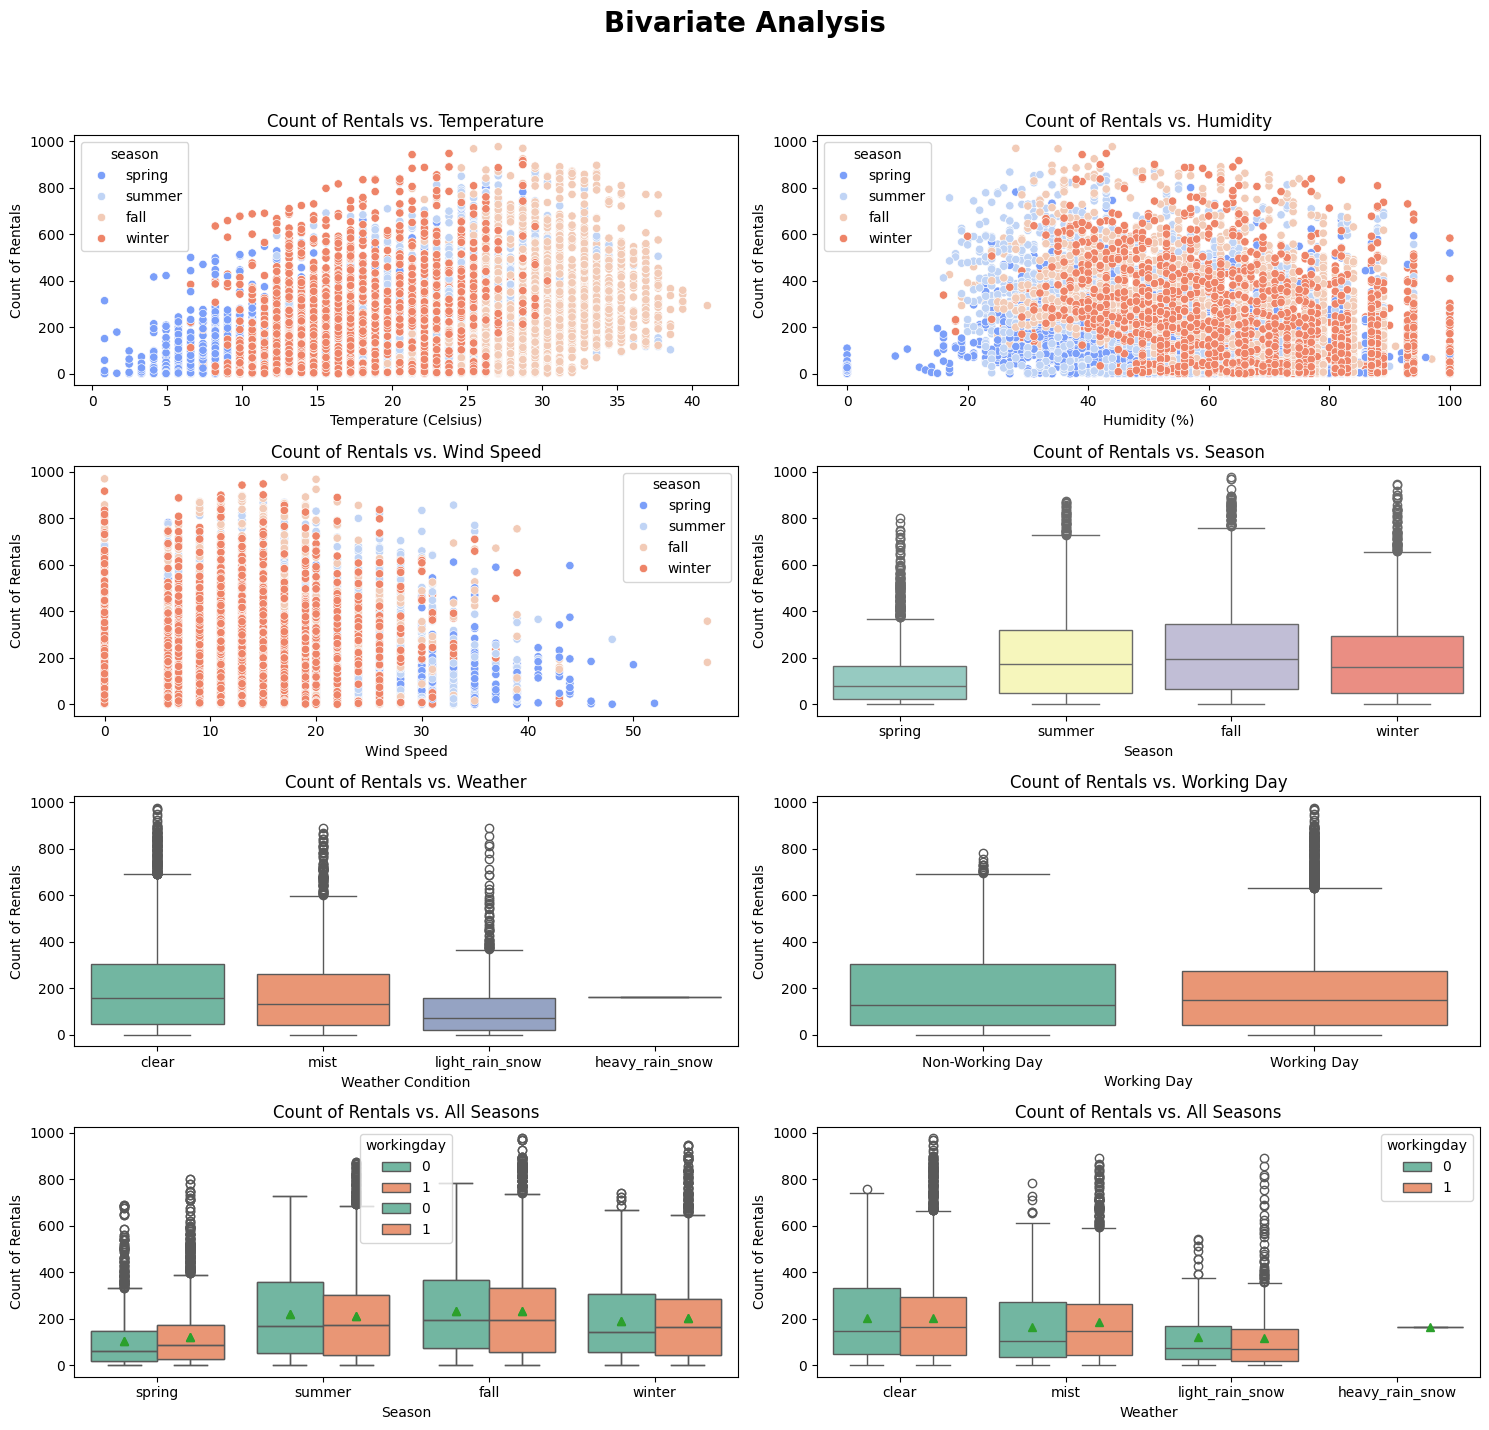

In [102]:
# create figure for bivariate analysis
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Bivariate Analysis', fontsize=20, fontweight='bold')

# count vs. temperature
sns.scatterplot(x='temp', y='count', data=df, hue='season', palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Count of Rentals vs. Temperature')
axes[0, 0].set_xlabel('Temperature (Celsius)')
axes[0, 0].set_ylabel('Count of Rentals')

# count vs. humidity
sns.scatterplot(x='humidity', y='count', data=df, hue='season', palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Count of Rentals vs. Humidity')
axes[0, 1].set_xlabel('Humidity (%)')
axes[0, 1].set_ylabel('Count of Rentals')

# count vs. wind Speed
sns.scatterplot(x='windspeed', y='count', data=df, hue='season', palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Count of Rentals vs. Wind Speed')
axes[1, 0].set_xlabel('Wind Speed')
axes[1, 0].set_ylabel('Count of Rentals')

# count vs. season
sns.boxplot(x='season', y='count', data=df, palette='Set3', ax=axes[1, 1])
axes[1, 1].set_title('Count of Rentals vs. Season')
axes[1, 1].set_xlabel('Season')
axes[1, 1].set_ylabel('Count of Rentals')

# count vs. weather
sns.boxplot(x='weather', y='count', data=df, palette='Set2', ax=axes[2, 0])
axes[2, 0].set_title('Count of Rentals vs. Weather')
axes[2, 0].set_xlabel('Weather Condition')
axes[2, 0].set_ylabel('Count of Rentals')

# count vs. working Day
sns.boxplot(x='workingday', y='count', data=df, palette='Set2', ax=axes[2, 1])
axes[2, 1].set_title('Count of Rentals vs. Working Day')
axes[2, 1].set_xlabel('Working Day')
axes[2, 1].set_ylabel('Count of Rentals')
axes[2, 1].set_xticklabels(['Non-Working Day', 'Working Day'])

# count vs. season
sns.boxplot(x='season', y='count', data=df, palette='Set2', hue='workingday', showmeans=True, ax=axes[3, 0])
axes[3, 0].set_title('Count of Rentals vs. All Seasons')
axes[3, 0].set_xlabel('Season')
axes[3, 0].set_ylabel('Count of Rentals')

# count vs. weather
sns.boxplot(x='weather', y='count', data=df, palette='Set2', hue='workingday', showmeans=True, ax=axes[3, 1])
sns.boxplot(x='season', y='count', data=df, palette='Set2', hue='workingday', showmeans=True, ax=axes[3, 0])
axes[3, 1].set_title('Count of Rentals vs. All Seasons')
axes[3, 1].set_xlabel('Weather')
axes[3, 1].set_ylabel('Count of Rentals')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Observations**
1. Count of Rentals vs. Temperature:
>* Rental counts generally increase with temperature, peaking around 20-30°C.
>* Different seasons exhibit different patterns; for instance, winter shows lower rental counts at higher temperatures compared to summer.

2. Count of Rentals vs. Humidity
>* There is a wide spread of rental counts across different humidity levels.
>* In general, rental counts are higher at moderate humidity levels (around 40-60%).
Seasonal variations are evident, with winter showing lower rentals across all humidity levels.

3. Count of Rentals vs. Wind Speed
>* Rental counts tend to decrease as wind speed increases.
>* Higher rental counts are observed at lower wind speeds (0-20 km/h).
>* Seasonality affects the relationship, with winter showing fewer rentals even at low wind speeds.

4. Count of Rentals vs. Season
>* Rental counts vary significantly across seasons.
>* Fall and summer generally have higher median rental counts compared to spring and winter.
>* Winter has the lowest median rental counts and a narrower interquartile range, indicating less variation.

5. Count of Rentals vs. Weather
>* Clear weather conditions result in higher rental counts, with a broader range of values.
>* Adverse weather conditions (heavy rain/snow) lead to significantly lower rental counts.
>* Mist and light rain/snow conditions also show reduced rental counts compared to clear weather.

6. Count of Rentals vs. Working Day
>* Rental counts are slightly higher on non-working days compared to working days.
>* Both categories have a wide range of rental counts, but non-working days show a slightly higher median.

7. Count of Rentals vs. All Seasons

>>Spring:
>>* Non-working days have a higher median rental count compared to working days.
>>* Both categories show a similar spread of rental counts, but non-working days have more outliers on the higher end.

>>Summer:
>>* The pattern is similar to spring, with non-working days showing a slightly higher median rental count and more variability.

>>Fall:
>>* Both working and non-working days exhibit similar median rental counts, but non-working days have a wider range and more high-value outliers.

>>Winter:
>>* Winter shows the lowest rental counts, with non-working days having a higher median and more variability compared to working days.

8. Count of Rentals vs. All Weather Conditions

>>Clear Weather:
>>* Non-working days have a higher median rental count compared to working days.
>>* There is a significant number of high-value outliers, especially on non-working days.

>>Mist:
>>* Both working and non-working days show similar median rental counts, but non-working days exhibit a wider range and more high-value outliers.

>>Light Rain/Snow:
>>* Rental counts drop significantly compared to clear weather and mist conditions.
>>* Non-working days still show slightly higher counts and more variability than working days.

>>Heavy Rain/Snow:
>>* Both working and non-working days show very low rental counts, with little to no variation, indicating adverse weather conditions significantly reduce rentals.

* **Temperature**: Rental counts increase with temperature, peaking in the moderate temperature range (20-30°C). Seasonal variations are evident.
* **Humidity**: Moderate humidity levels are associated with higher rental counts. Seasonal differences affect this relationship.
* **Wind Speed**: Higher wind speeds correlate with lower rental counts, with the most significant rentals occurring at lower wind speeds.
* **Season**: Fall and summer have higher median rental counts compared to spring and winter.
* **Weather**: Clear weather conditions lead to higher rental counts, while adverse conditions significantly reduce rentals.
* **Working Day**: Non-working days have slightly higher rental counts compared to working days, with a broader range of values.
* **Seasonal Variations**: Non-working days generally have higher median rental counts and more variability across all seasons.
Fall and summer show the highest rental counts, while winter shows the lowest.
* **Weather Conditions**:Clear weather conditions are associated with the highest rental counts, especially on non-working days.
Adverse weather conditions like heavy rain/snow drastically reduce rental counts for both working and non-working days.


**4.3 Correlation Matrix**

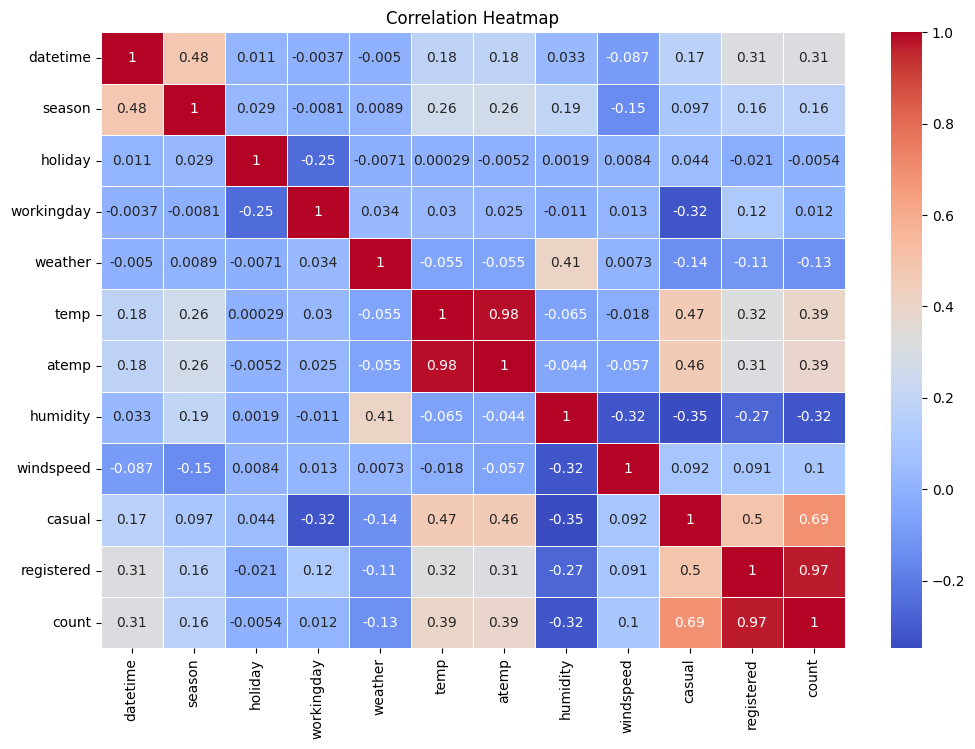

In [103]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_copied.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Observation**
1. **Count (Dependent Variable)**

>* **registered (0.97)**: Very strong positive correlation, indicating that as the number of registered users increases, the total count of rentals also increases significantly.
>* **casual (0.69)**: Strong positive correlation, indicating that as the number of casual users increases, the total count of rentals also increases.
>* **temp (0.39) & atemp (0.39)**: Moderate positive correlation, suggesting that higher temperatures are associated with higher rental counts.
>* **humidity (-0.32)**: Moderate negative correlation, suggesting that higher humidity levels are associated with lower rental counts.

2. **Registered**

>* **count (0.97)**: Very strong positive correlation with count, as explained above.
>* **casual (0.50)**: Moderate positive correlation, suggesting some relationship between the number of casual and registered users.
>* **temp (0.32) & atemp (0.31)**: Moderate positive correlation with temperature, suggesting that higher temperatures are associated with higher registered user rentals.
>* **humidity (-0.27)**: Negative correlation, suggesting that higher humidity is associated with fewer registered user rentals.

3. **Casual**

>* **count (0.69)**: Strong positive correlation with count, as explained above.
>* **temp (0.47) & atemp (0.46)**: Moderate positive correlation with temperature, suggesting that higher temperatures are associated with higher casual user rentals.
>* **humidity (-0.35)**: Moderate negative correlation, suggesting that higher humidity levels are associated with lower casual user rentals.
>* **workingday (-0.32)**: Negative correlation, indicating that there are fewer casual rentals on working days.

4. **Temp and atemp**

>* **temp and atemp (0.98)**: Very strong positive correlation between actual temperature and feeling temperature, indicating they move together almost perfectly.

5. **Other Variables**

>* **humidity and windspeed (-0.32)**: Moderate negative correlation, suggesting that higher wind speeds are associated with lower humidity levels.
>* **season and temp (0.26)**: Positive correlation, suggesting that temperature varies across different seasons.
>* **holiday and workingday (-0.25)**: Negative correlation, indicating that holidays are not working days.

6. **Insights**

* **Strong Correlations with count**:

>* The number of registered users (registered) and casual users (casual) are the primary drivers of the total rental count.
>* Temperature positively affects rental counts, while humidity negatively affects them.

* **High Correlation between temp and atemp**:

>* Since temp (actual temperature) and atemp (feeling temperature) are highly correlated (0.98), one of them can be removed to avoid multicollinearity in further analysis.

* **Impact of Weather and Working Days**:

>* Weather conditions like temperature and humidity significantly impact bike rentals.
>* There are fewer casual rentals on working days, indicating that casual rentals are more common on weekends or holidays.



**4.4 Remove highly correlated variables**

In [104]:
# calculate the correlation matrix
corr_matrix = df_copied.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # upper triangle
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)] # correlation greater than 0.75
df_reduced = df_copied.drop(columns=to_drop)
print("Dropped columns:", to_drop)

Dropped columns: ['atemp', 'count']


In [105]:
df_reduced.head()

datetime  season  holiday  workingday  weather  temp  humidity  \
0 2011-01-01 00:00:00       1        0           0        1  9.84        81   
1 2011-01-01 01:00:00       1        0           0        1  9.02        80   
2 2011-01-01 02:00:00       1        0           0        1  9.02        80   
3 2011-01-01 03:00:00       1        0           0        1  9.84        75   
4 2011-01-01 04:00:00       1        0           0        1  9.84        75   

   windspeed  casual  registered  
0        0.0       3          13  
1        0.0       8          32  
2        0.0       5          27  
3        0.0       3          10  
4        0.0       0           1

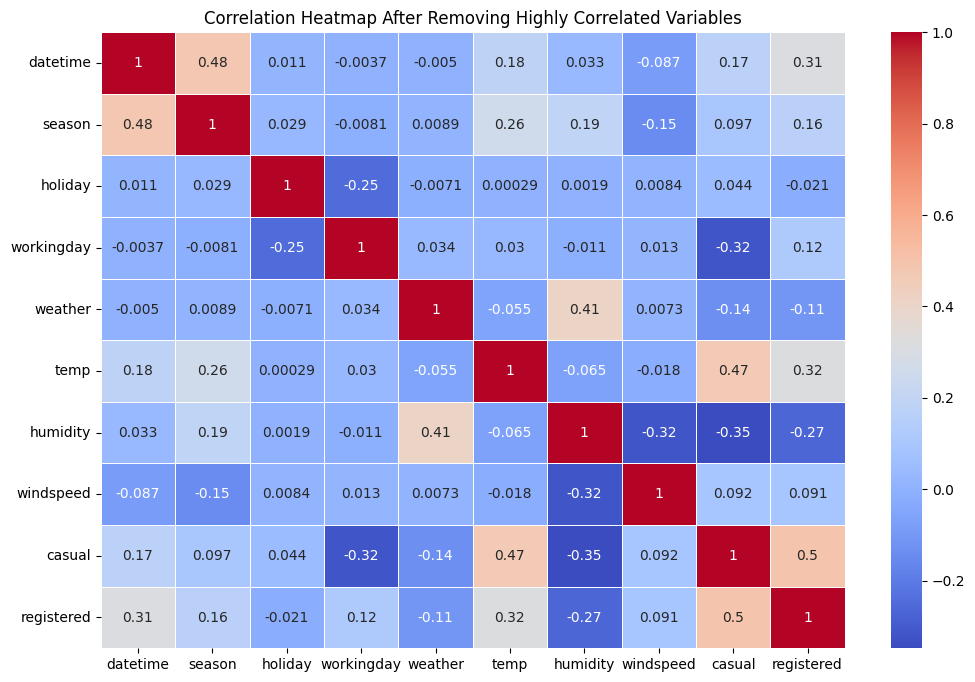

In [106]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_reduced.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap After Removing Highly Correlated Variables')
plt.show()

**Observation**
Correlation matrix after removing highly correlated variables does not observe multicollinearity.


[]

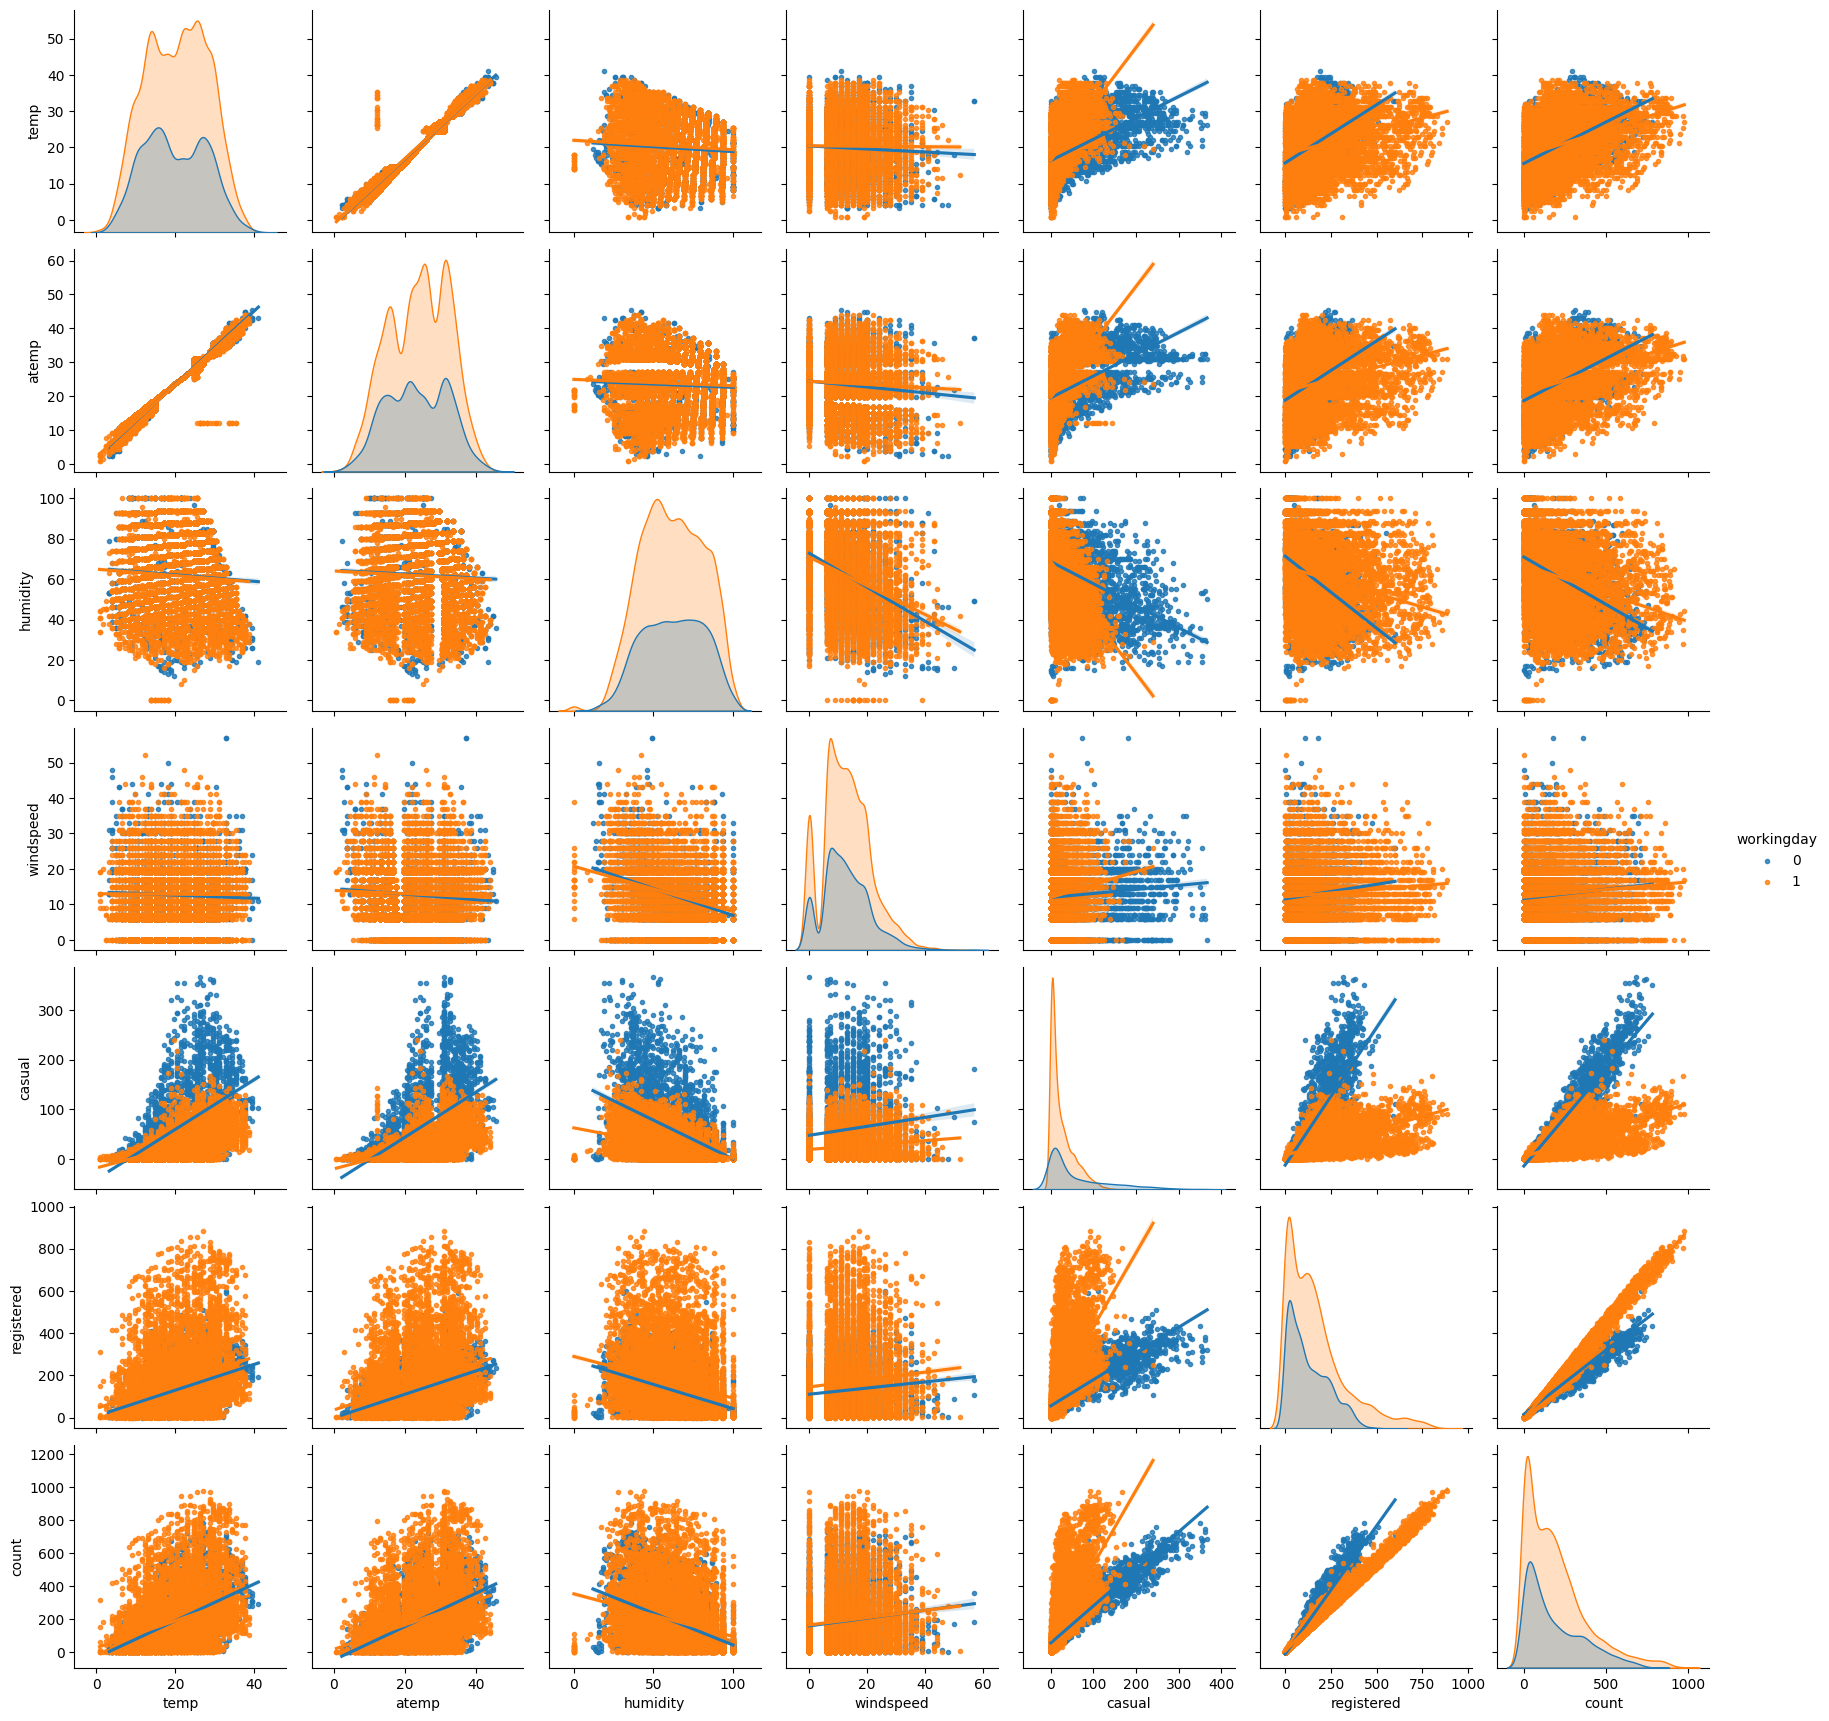

In [107]:
sns.pairplot(data = df,
             kind = 'reg',
             hue = 'workingday',
             markers = '.')
plt.plot()

#5. Hypothesis Testing and Analysis


**5.1 Analyzing the Difference in Bike Rides on Weekdays and Weekends**

**Steps to follow:**
1. Formulate Hypotheses
2. Select the Appropriate Test
3. Check assumptions of the test
4. Set the Significance Level
5. Calculate Test Statistics and p-value
6. Decide on the Null Hypothesis
7. Draw Inferences and Conclusions



**5.1.1 Formulate Hypothesis**

* **Null Hypothesis (H0)**: There is no significant difference in the number of bike rides between weekdays and weekends.
* **Alternate Hypothesis (Ha)**: There is a significant difference in the number of bike rides between weekdays and weekends.

In [108]:
H0 = "There is no significant difference in the number of bike rides between weekdays and weekends."
Ha = "There is a significant difference in the number of bike rides between weekdays and weekends."

**5.1.2 Select the Appropriate Test**

We will use a **2-sample independent t-test** to compare the means of the two groups (weekdays and weekends)

In [109]:
# create a new column for weekdays and weekends
df['weekday'] = df['datetime'].dt.dayofweek
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0) # >=5 because week starts with 0 on Sunday

# separate the data
weekend_data = df[df['is_weekend'] == 1]['count']
weekday_data = df[df['is_weekend'] == 0]['count']

df.head()

datetime  season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  spring  Workday           0   clear  9.84  14.395   
1 2011-01-01 01:00:00  spring  Workday           0   clear  9.02  13.635   
2 2011-01-01 02:00:00  spring  Workday           0   clear  9.02  13.635   
3 2011-01-01 03:00:00  spring  Workday           0   clear  9.84  14.395   
4 2011-01-01 04:00:00  spring  Workday           0   clear  9.84  14.395   

   humidity  windspeed  casual  registered  count  weekday  is_weekend  
0        81        0.0       3          13     16        5           1  
1        80        0.0       8          32     40        5           1  
2        80        0.0       5          27     32        5           1  
3        75        0.0       3          10     13        5           1  
4        75        0.0       0           1      1        5           1

**5.1.3 Check assumptions for the test**



Weekday Skewness:  1.3304135549563332
Weekday Kurtosis:  1.6790316316182166
Weekend Skewness:  0.9790114975489601
Weekend Kurtosis:  0.0722796126591807
Shapiro-Wilk Test for Weekday Rides:  ShapiroResult(statistic=0.8719626665115356, pvalue=0.0)
Shapiro-Wilk Test for Weekend Rides:  ShapiroResult(statistic=0.8839035630226135, pvalue=1.1770907100328463e-43)
Levene’s Test for equality of variance:  LeveneResult(statistic=0.003153454582717379, pvalue=0.955218859658268)


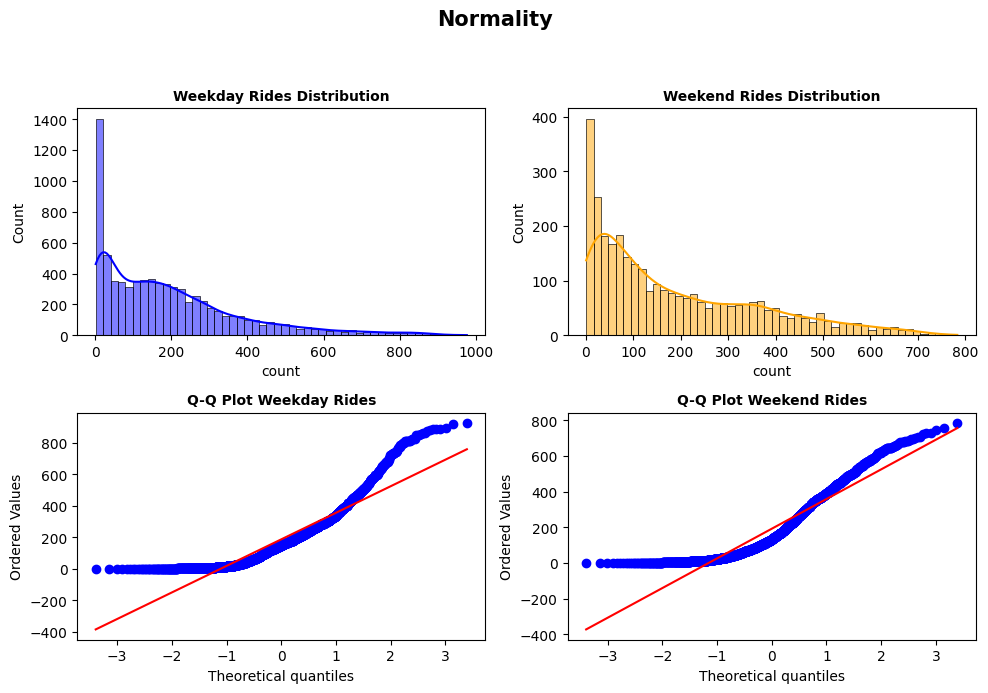

In [110]:
# create figure and subplots manually
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Normality', fontsize=15, fontweight='bold')

# histogram
ax1 = fig.add_subplot(321)
sns.histplot(weekday_data, bins=50, kde=True, color='blue', ax=ax1)
ax1.set_title('Weekday Rides Distribution', fontsize=10, fontweight='bold')

# histogram
ax2 = fig.add_subplot(322)
sns.histplot(weekend_data, bins=50, kde=True, color='orange', ax=ax2)
ax2.set_title('Weekend Rides Distribution', fontsize=10, fontweight='bold')

# create the axes for the Q-Q plots
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)

# plot the Q-Q plots
stats.probplot(weekday_data.sample(2000), dist="norm", plot=ax3)
ax3.set_title('Q-Q Plot Weekday Rides', fontsize=10, fontweight='bold')
stats.probplot(weekend_data.sample(2000), dist="norm", plot=ax4)
ax4.set_title('Q-Q Plot Weekend Rides', fontsize=10, fontweight='bold')

# skewness and kurtosis
print("Weekday Skewness: ", stats.skew(weekday_data))
print("Weekday Kurtosis: ", stats.kurtosis(weekday_data))
print("Weekend Skewness: ", stats.skew(weekend_data))
print("Weekend Kurtosis: ", stats.kurtosis(weekend_data))


# shapiro-wilk test
shapiro_weekday = shapiro(weekday_data)
shapiro_weekend = shapiro(weekend_data)
print('Shapiro-Wilk Test for Weekday Rides: ', shapiro_weekday)
print('Shapiro-Wilk Test for Weekend Rides: ', shapiro_weekend)

# levene test
levene_test = levene(weekday_data, weekend_data)
print('Levene’s Test for equality of variance: ', levene_test)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Observations:**
* From QQ plot:
>* **Weekday ride**: The points deviate significantly from the red line, especially in the tails, indicating that the weekday ride counts are not normally distributed.
>* **Weekend ride**: The points also deviate from the red line, indicating that the weekend ride counts are not normally distributed. The deviation is less pronounced compared to weekdays, but normality is still violated.

**5.1.4 Set significance level at alpha = 0.05 (95% confidence)**

**5.1.5 Calculate Test Statistics and p-value**

In [111]:
t_stat, p_value = stats.ttest_ind(weekday_data, weekend_data, equal_var=True)
print('T-test Statistics: ', t_stat)
print('P-value: ', p_value)

T-test Statistics:  1.0354386367292092
P-value:  0.30048711429228286


**5.1.6 Decide on the Null Hypothesis**

In [112]:
alpha=0.05
if p_value < alpha:
  print(f'Reject H0: {Ha}')
else:
  print (f'Fail to Reject H0: {H0}')

Fail to Reject H0: There is no significant difference in the number of bike rides between weekdays and weekends.


**5.1.7 Draw Inferences and Conclusions**

1. **Skewness and Kurtosis**

Weekday Skewness: 1.3304

Weekend Skewness: 0.9790
* Both values indicate that the data is right-skewed, meaning there are more
values on the lower end and a longer tail on the higher end.
* The weekday data is more skewed than the weekend data.

Weekday Kurtosis: 1.6790

Weekend Kurtosis: 0.0723
* Both values indicate that the data has heavier tails than a normal distribution (leptokurtic), with the weekday data being more leptokurtic than the weekend data.

2. **Shapiro-Wilk Test for Normality**

* Weekday Rides: ShapiroResult(statistic=0.8719, pvalue=0.0)
* Weekend Rides: ShapiroResult(statistic=0.8839, pvalue=1.1771e-43)
* The p-values for both weekday and weekend rides are 0.0 and 1.1771e-43, respectively, which are much less than the significance level of 0.05.
* This indicates that both datasets do not follow a normal distribution.

3. **Levene’s Test for Equality of Variance**

* Levene’s Test: LeveneResult(statistic=0.0032, pvalue=0.9552)
* The p-value is 0.9552, which is greater than the significance level of 0.05. * This indicates that we do not reject the null hypothesis of equal variances. * Thus, we can assume that the variances of weekday and weekend ride counts are equal.

4. **T-test for Difference in Means**

* At 95% confidence level, we fail to reject the Null Hypothesis.
* There is no significant difference in the number of bike rides between weekdays and weekends.

**Insights:**
* Yulu can adjust bike availability and optimize distribution strategies to cater to higher demands on weekends.
* Special promotions and discounts can be targeted towards the days with lower rentals to balance the demand.
* Investigate other factors that might influence these differences, such as weather conditions, special events, or time of the day



**5.2 Check if the demand of bicycles on rent is the same for different Weather conditions?**

**5.2.1 Formulate Hypothesis**

* **Null Hypothesis (H0)**: The demand for bicycles on rent is the same across different weather conditions.
* **Alternate Hypothesis (Ha)**: The demand for bicycles on rent is different across different weather conditions.

In [113]:
H0 = "The demand for bicycles on rent is the same across different weather conditions."
Ha = "The demand for bicycles on rent is different across different weather conditions."

**5.2.2 Select appropriate test**

We will use a One-way ANOVA test to compare the means of the demand for bicycles across different weather conditions.

**5.2.3 Check normality**

In [114]:
weather_conditions = df['weather'].unique()
weather_data = {condition: df[df['weather'] == condition]['count'] for condition in weather_conditions}
weather_data

{'clear': 0         16
 1         40
 2         32
 3         13
 4          1
         ... 
 10881    336
 10882    241
 10883    168
 10884    129
 10885     88
 Name: count, Length: 7192, dtype: int64,
 'mist': 5          1
 13        94
 14       106
 15       110
 16        93
         ... 
 10835    120
 10836     54
 10838     18
 10839     15
 10840      7
 Name: count, Length: 2834, dtype: int64,
 'light_rain_snow': 18        35
 19        37
 29         2
 31         8
 37        59
         ... 
 10808    107
 10818      5
 10830    302
 10837     47
 10850    313
 Name: count, Length: 859, dtype: int64,
 'heavy_rain_snow': 5631    164
 Name: count, dtype: int64}

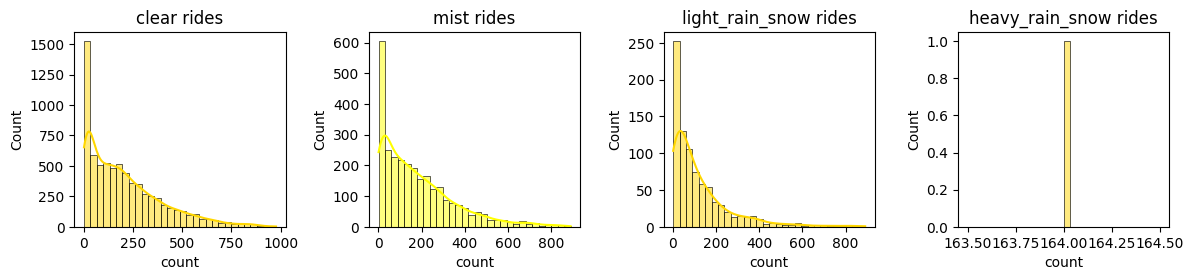

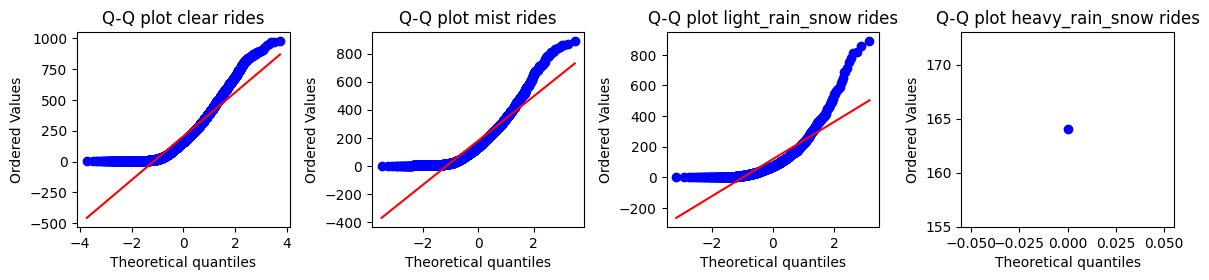

clear Skewness:  1.1396195185041555
clear Kurtosis:  0.9632151489948488
Shapiro-Wilk Test for clear Rides:  ShapiroResult(statistic=0.8909230828285217, pvalue=0.0)

mist Skewness:  1.293759189703101
mist Kurtosis:  1.5835130178554868
Shapiro-Wilk Test for mist Rides:  ShapiroResult(statistic=0.8767687082290649, pvalue=9.781063280987223e-43)

light_rain_snow Skewness:  2.1833160390123187
light_rain_snow Kurtosis:  5.961191782478394
Shapiro-Wilk Test for light_rain_snow Rides:  ShapiroResult(statistic=0.7674332857131958, pvalue=3.876090133422781e-33)

heavy_rain_snow Skewness:  nan
heavy_rain_snow Kurtosis:  nan
Skipping Shapiro-Wilk test for heavy_rain_snow due to insufficient data

Levene’s Test for equality of variance:  LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)


In [115]:
# histogram
plt.figure(figsize=(12, 5))

for i, (condition, data) in enumerate(weather_data.items()):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data, bins=30, kde=True, color=random.choice(['yellow', 'gold', 'pink', 'blue']))
    plt.title(f'{condition} rides')

plt.tight_layout()
plt.show()

# qq plot
plt.figure(figsize=(12, 5))

for i, (condition, data) in enumerate(weather_data.items()):
    plt.subplot(2, 4, i + 1)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot {condition} rides')

plt.tight_layout()
plt.show()

# skewness, kurtosis and shapiro-wilk test

for condition, data in weather_data.items():
    print(f"{condition} Skewness: ", stats.skew(data))
    print(f"{condition} Kurtosis: ", stats.kurtosis(data))

    if len(data) >= 3:
        shapiro_test = shapiro(data)
        print(f'Shapiro-Wilk Test for {condition} Rides: ', shapiro_test)
    else:
        print(f'Skipping Shapiro-Wilk test for {condition} due to insufficient data')
    print()

# levene's test

levene_test = levene(*weather_data.values())
print('Levene’s Test for equality of variance: ', levene_test)


**Observations**
* Its observed from the QQ plot that the clear, mist, light_rain and heavy_rain rides do not follow a normal distribution.
* The values for heavy rain are so low that the skewness and Shapiro Wilk test cannot be identified and conducted respectively.
* **Clear weather** indicates that: Indicates the distribution is moderately right-skewed (long tail on the right) and the distribution has a slightly higher peak and heavier tails compared to a normal distribution. Since the Shapiro Wilk test is 0, the data is not normally distributed.
* **Mist Weather** indicates the distribution is moderately right-skewed.
Lirtosis indicates that the distribution has a higher peak and heavier tails compared to a normal distribution.
Shapiro-Wilk Test:indicates the data is not normally distributed.
* **Light Rain/Snow** indicates the distribution is highly right-skewed.
Kurtosis indicates the distribution has a much higher peak and heavier tails compared to a normal distribution.
Shapiro-Wilk test indicates the data is not normally distributed.
* **Heavy Rain/Snow** : too less values to calculate

**Interpretation**

* **Non-Normality**: The Shapiro-Wilk test p-values for clear, mist, and light rain/snow conditions are all less than 0.05, indicating that the distributions of bike rentals for these weather conditions are not normally distributed.
* **High Skewness and Kurtosis**: Particularly for light rain/snow, the high skewness and kurtosis values suggest significant deviation from normality with a long right tail and heavy tails.


**5.2.4 Set confidence level at 95%**

**5.2.5 Calculate test statistic and p_value**

In [116]:
# levene's test
levene_test = levene(
    weather_data['clear'],
    weather_data['mist'],
    weather_data['light_rain_snow'],
    weather_data['heavy_rain_snow'])
print('Levene’s Test for equality of variance: ', levene_test)

# anova test
anova_test = f_oneway(
    weather_data['clear'],
    weather_data['mist'],
    weather_data['light_rain_snow'],
    weather_data['heavy_rain_snow'])
print('ANOVA Test Statistics: ', anova_test.statistic)
print('P-value: ', anova_test.pvalue)

# kruskall wallis test
kruskal_test = kruskal(
    weather_data['clear'],
    weather_data['mist'],
    weather_data['light_rain_snow'],
    weather_data['heavy_rain_snow']
)
print('Kruskal-Wallis H Test Statistics: ', kruskal_test.statistic)
print('P-value: ', kruskal_test.pvalue)


Levene’s Test for equality of variance:  LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)
ANOVA Test Statistics:  65.53024112793271
P-value:  5.482069475935669e-42
Kruskal-Wallis H Test Statistics:  205.00216514479087
P-value:  3.501611300708679e-44


**5.2.6 Decide on Null Hypothesis**



In [117]:
alpha=0.05
if anova_test.pvalue < alpha:
  print(f'Reject H0: {Ha}')
else:
  print (f'Fail to Reject H0: {H0}')

Reject H0: The demand for bicycles on rent is different across different weather conditions.


**5.2.7 Draw Inferences and Conclusions**

1. **Levene’s Test for Equality of Variance**

Levene’s Test Statistic: 54.85
P-value: 3.50e-35

* The p-value is much less than 0.05, indicating that we reject the null hypothesis of equal variances.
* This means there is a significant difference in the variances of bike rentals across different weather conditions.

2. **One-way ANOVA Test**

ANOVA Test Statistic: 65.53
P-value: 5.48e-42

* The p-value is much less than 0.05, indicating that we reject the null hypothesis.
* This means there is a significant difference in the mean bike rentals across different weather conditions.
* However, because the Levene’s Test indicated unequal variances and our data did not meet the normality assumption, the results of the ANOVA should be interpreted with caution.

3. **Kruskal-Wallis H Test**

Kruskal-Wallis H Test Statistic: 205.00
P-value: 3.50e-44

* The p-value is much less than 0.05, indicating that we reject the null hypothesis.
* This means there is a significant difference in the distributions of bike rentals across different weather conditions.

Summary of Findings

* **At 95% confidence level**, we reject null hypothesis. This means that the demand for bicycles on rent is different across different weather conditions.

* **Clear Weather**: Ensure high availability of bikes as the demand is significantly higher.
* **Adverse Weather (Mist, Light Rain/Snow, Heavy Rain/Snow)**: Reduce bike availability or redistribute to areas with shelters or indoor parking to protect the bikes and reduce maintenance costs.
* **Promotions**: Offer discounts or promotions during adverse weather conditions to encourage rentals.
* **Weather-Based Campaigns**: Use weather forecasts to run targeted marketing campaigns that promote bike rentals during clear weather days.



**5.3 Check if the demand of bicycles on rent is the same for different Seasons?**

**5.3.1 Formulate Hypothesis**
* **Null Hypothesis (H0)**: The demand for bicycles on rent is the same across different seasons.
* **Alternate Hypothesis (H1)**: The demand for bicycles on rent is different across different seasons.

In [118]:
H0 = "The demand for bicycles on rent is the same across different seasons."
Ha = "The demand for bicycles on rent is different across different seasons."

**5.3.2 Select an appropriate test**

We will use a One-way ANOVA test to compare the means of the demand for bicycles across different seasons.

**5.3.3 Check assumptions for the test**

In [119]:
season_conditions = df['season'].unique()
season_data = {season: df[df['season'] == season]['count'] for season in season_conditions}
season_data

{'spring': 0        16
 1        40
 2        32
 3        13
 4         1
        ... 
 6780    549
 6781    330
 6782    223
 6783    148
 6784     54
 Name: count, Length: 2686, dtype: int64,
 'summer': 1323      6
 1324      4
 1325      7
 1326      4
 1327      3
        ... 
 8146    514
 8147    458
 8148    276
 8149    291
 8150    125
 Name: count, Length: 2733, dtype: int64,
 'fall': 2690     68
 2691     31
 2692     13
 2693     11
 2694      6
        ... 
 9514    611
 9515    409
 9516    349
 9517    229
 9518    123
 Name: count, Length: 2733, dtype: int64,
 'winter': 4055     130
 4056      58
 4057      67
 4058      25
 4059       8
         ... 
 10881    336
 10882    241
 10883    168
 10884    129
 10885     88
 Name: count, Length: 2734, dtype: int64}

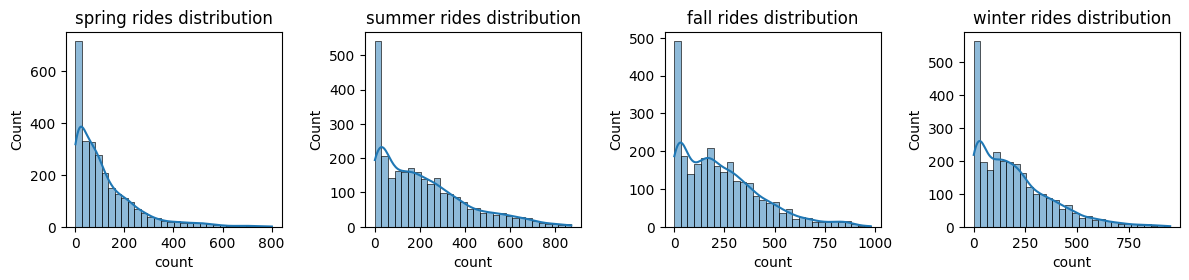

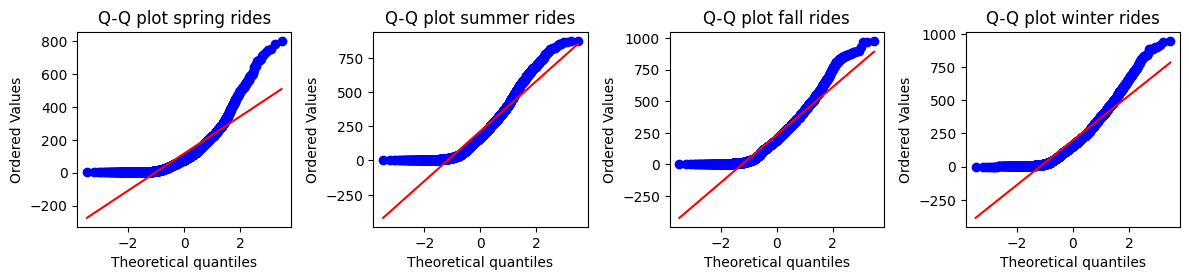

spring Skewness:  1.8870013494363214
spring Kurtosis:  4.30449666648592
Shapiro-Wilk Test for spring Rides:  ShapiroResult(statistic=0.8087388873100281, pvalue=0.0)

summer Skewness:  1.0027135037743604
summer Kurtosis:  0.4222412657621657
Shapiro-Wilk Test for summer Rides:  ShapiroResult(statistic=0.900481641292572, pvalue=6.039093315091269e-39)

fall Skewness:  0.9909503852121176
fall Kurtosis:  0.6959091337333851
Shapiro-Wilk Test for fall Rides:  ShapiroResult(statistic=0.9148160815238953, pvalue=1.043458045587339e-36)

winter Skewness:  1.1714741534595685
winter Kurtosis:  1.2689637849725477
Shapiro-Wilk Test for winter Rides:  ShapiroResult(statistic=0.8954644799232483, pvalue=1.1301682309549298e-39)

Levene’s Test for equality of variance:  LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)


In [120]:
# histogram
plt.figure(figsize=(12, 5))
for i, (season, data) in enumerate(season_data.items()):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data, bins=30, kde=True)
    plt.title(f'{season} rides distribution')

plt.tight_layout()
plt.show()

# qq plot
plt.figure(figsize=(12, 5))
for i, (season, data) in enumerate(season_data.items()):
    plt.subplot(2, 4, i + 1)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot {season} rides')

plt.tight_layout()
plt.show()

# skewness & kurtosis and shapiro-wilk’s test
for season, data in season_data.items():
    print(f"{season} Skewness: ", stats.skew(data))
    print(f"{season} Kurtosis: ", stats.kurtosis(data))

    shapiro_test = shapiro(data)
    print(f'Shapiro-Wilk Test for {season} Rides: ', shapiro_test)
    print()

# levene's test
levene_test = levene(
    season_data['spring'],
    season_data['summer'],
    season_data['fall'],
    season_data['winter']
)
print('Levene’s Test for equality of variance: ', levene_test)




**Observation**

* From the QQ-plot: we understand that **spring rides** data points deviate significantly from the red line, especially in the tails (both lower and upper ends). This means that the distribution of bike rentals in spring is not normally distributed. The data shows heavier tails and a positive skew.
* From the QQ-plot: we understand that **summer rides** data points show a similar pattern of deviation from the red line, particularly at the upper end. This means that distribution of bike rentals in summer is also not normally distributed. The data is right-skewed with heavy tails.
* From the QQ-plot: we understand that **fall rides** data points again deviate from the red line, with noticeable deviations in both tails. This means that distribution of bike rentals in fall is not normally distributed. The data shows a positive skew and heavy tails.
* From the QQ-plot: we understand that **winter rides** data points for winter rides show significant deviations from the red line, especially in the upper quantiles. This means that distribution of bike rentals in winter is not normally distributed. The data is right-skewed with heavy tails.

**5.3.4 Set confidence level at 95%**

**5.3.5 Calculate test statistic and p_value**

In [121]:
# levene's test
levene_test = levene(
    season_data['spring'],
    season_data['summer'],
    season_data['fall'],
    season_data['winter']
)
print('Levene’s Test for equality of variance: ', levene_test)

# anova test
anova_test = f_oneway(
    season_data['spring'],
    season_data['summer'],
    season_data['fall'],
    season_data['winter']
)
print('ANOVA Test Statistics: ', anova_test.statistic)
print('P-value: ', anova_test.pvalue)

# kruskal wallis h test
kruskal_test = kruskal(
    season_data['spring'],
    season_data['summer'],
    season_data['fall'],
    season_data['winter']
)
print('Kruskal-Wallis H Test Statistics: ', kruskal_test.statistic)
print('P-value: ', kruskal_test.pvalue)

Levene’s Test for equality of variance:  LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)
ANOVA Test Statistics:  236.94671081032106
P-value:  6.164843386499654e-149
Kruskal-Wallis H Test Statistics:  699.6668548181988
P-value:  2.479008372608633e-151


**5.3.6 Decide on Null Hypothesis**

In [122]:
alpha=0.05
if anova_test.pvalue < alpha:
  print(f'Reject H0: {Ha}')
else:
  print (f'Fail to Reject H0: {H0}')

Reject H0: The demand for bicycles on rent is different across different seasons.


**5.3.7 Draw Inferences and Conclusions**

1. **Levene’s Test for Equality of Variance**

Statistic: 187.77
P-value: 1.01e-118

* The p-value is much less than 0.05, indicating that we reject the null hypothesis of equal variances.
* This means there is a significant difference in the variances of bike rentals across different seasons.

2. **One-way ANOVA Test**

Statistic: 236.95
P-value: 6.16e-149

* The p-value is much less than 0.05, indicating that we reject the null hypothesis.
* This means there is a significant difference in the mean bike rentals across different seasons.

3. **Kruskal-Wallis H Test**

Statistic: 699.67
P-value: 2.48e-151

* The p-value is much less than 0.05, indicating that we reject the null hypothesis.
* This means there is a significant difference in the distributions of bike rentals across different seasons.

**Summary of Findings**

1. **At 95% confidence level**, we reject the null hypothesis. This indicates that the demand for bicycles on rent is different across different seasons.

2. **High-Demand Seasons (e.g., Summer and Fall)**:
* Increase the fleet size to meet higher demand.
* Ensure adequate maintenance and availability of bikes.

3. **Low-Demand Seasons (e.g., Winter)**:
* Plan for reduced bike usage.
* Focus on maintenance and redistribution strategies.

4. **Seasonal Promotions**:
* Offer discounts and promotions during low-demand seasons to encourage rentals.

5. **Targeted Campaigns**:
* Use historical data to run targeted marketing campaigns that promote bike rentals during high-demand seasons.

**5.4 Check if the Weather conditions are significantly different during different Seasons?**

**5.4.1 Formulate Hypothesis**
* **Null Hypothesis (H0)**: Weather conditions are independent of the seasons (no significant difference in weather conditions across different seasons).
* **Alternate Hypothesis (Ha)**: Weather conditions are not independent of the seasons (significant difference in weather conditions across different seasons)


In [123]:
H0 = "Weather conditions are independent of the seasons (no significant difference in weather conditions across different seasons)."
Ha = "Weather conditions are not independent of the seasons (significant difference in weather conditions across different seasons)"

**5.4.2 Select an appropriate test**

We will use a Chi-square test of independence to compare the categorical variables 'Weather' and 'Season'

**5.4.3 Create a crosstab table**

Using Pandas' crosstab function, we create a contingency table to show the frequency distribution of weather conditions across different seasons.

**5.4.4 Set a Significance Level**

Significance Level (alpha): 0.05

**5.4.5 Calculate Test Statistics/P-Value**


In [124]:
contingency_table = pd.crosstab(df['season'], df['weather'])
print("Contingency Table:\n", contingency_table)

Contingency Table:
 weather  clear  heavy_rain_snow  light_rain_snow  mist
season                                                
fall      1930                0              199   604
spring    1759                1              211   715
summer    1801                0              224   708
winter    1702                0              225   807


**5.4.6 Perform Chi-square test of independence**

In [125]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Chi-square Test Statistic:', chi2)
print('P-value:', p)
print('Degrees of Freedom:', dof)
print('Expected Frequencies:\n', expected)


Chi-square Test Statistic: 49.158655596893624
P-value: 1.549925073686492e-07
Degrees of Freedom: 9
Expected Frequencies:
 [[1.80559765e+03 2.51056403e-01 2.15657450e+02 7.11493845e+02]
 [1.77454639e+03 2.46738931e-01 2.11948742e+02 6.99258130e+02]
 [1.80559765e+03 2.51056403e-01 2.15657450e+02 7.11493845e+02]
 [1.80625831e+03 2.51148264e-01 2.15736359e+02 7.11754180e+02]]


**5.4.7 Decide on Null Hypothesis**

In [126]:
alpha=0.05
if anova_test.pvalue < alpha:
  print(f'Reject H0: {Ha}')
else:
  print (f'Fail to Reject H0: {H0}')

Reject H0: Weather conditions are not independent of the seasons (significant difference in weather conditions across different seasons)


**5.4 8 Draw inferences and conclusions**

**Summary of Findings**
* **At 95% confidence level**, we reject the null hypothesis. Weather conditions are not independent of the seasons (significant difference in weather conditions across different seasons)
* Adjust bike availability and distribution based on the seasonal weather patterns.
* Prepare for specific weather conditions that are more prevalent in certain seasons to optimize bike maintenance and usage.
* Tailor promotions and marketing campaigns according to the prevalent weather conditions in each season.
* Highlight the benefits of bike rentals in favorable weather conditions to increase rentals.

**5.5 Is there any effect of Working Day on the number of electric cycles rented ?**

**5.5.1 Formulate Hypothesis**

* **Null Hypothesis (H0)**: There is no significant difference in the number of electric cycles rented between working days and non-working days.
* **Alternate Hypothesis (Ha**): There is a significant difference in the number of electric cycles rented between working days and non-working days.

In [127]:
H0 = "There is no significant difference in the number of electric cycles rented between working days and non-working days."
Ha = "There is a significant difference in the number of electric cycles rented between working days and non-working days."

**5.5.2 Select an appropriate test**

We will use a 2-sample independent t-test if the data meets the assumptions of normality

**5.5.3 Set significance level at alpha = 0.05 (95% confidence)**

**5.5.4 Check Assumptions of the Test**

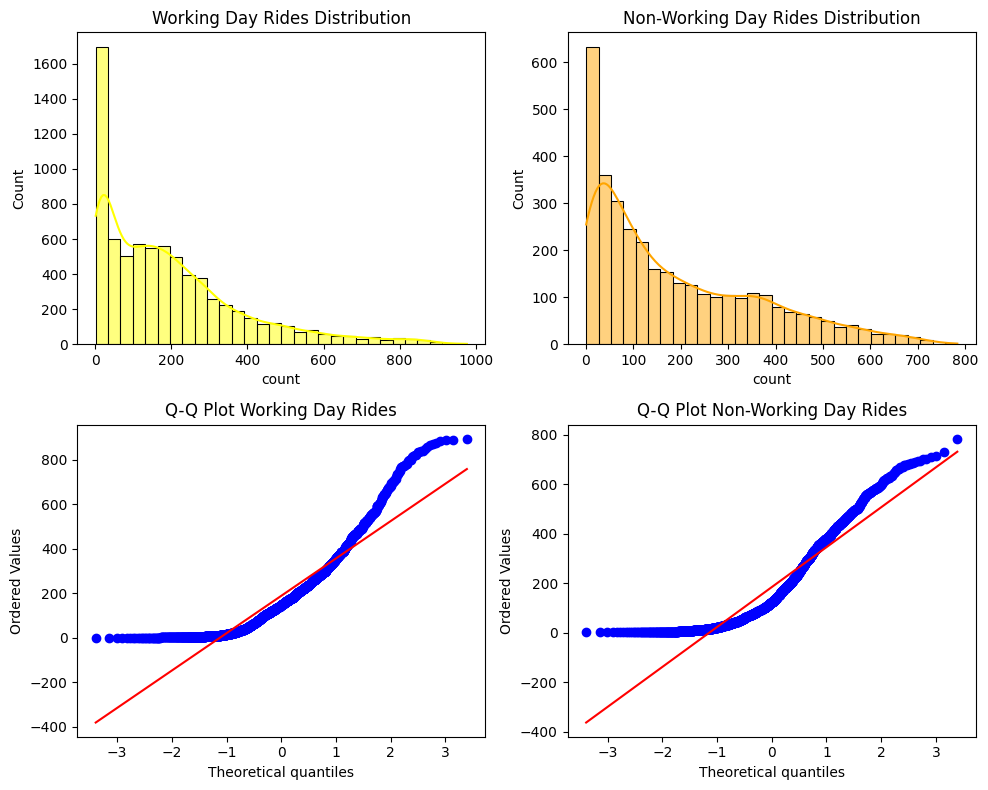

Working Day Skewness:  1.3464498800708273
Working Day Kurtosis:  1.7303727266423303
Non-Working Day Skewness:  0.963621480100446
Non-Working Day Kurtosis:  0.034597571483796496
Shapiro-Wilk Test for Working Day Rides:  ShapiroResult(statistic=0.8702582120895386, pvalue=0.0)
Shapiro-Wilk Test for Non-Working Day Rides:  ShapiroResult(statistic=0.8852126598358154, pvalue=4.203895392974451e-45)
Levene’s Test for equality of variance:  LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)


In [128]:
workingday_data = df[df['workingday'] == 1]['count']
non_workingday_data = df[df['workingday'] == 0]['count']

# histogram
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.histplot(workingday_data, bins=30, kde=True, color='yellow')
plt.title('Working Day Rides Distribution')

plt.subplot(2, 2, 2)
sns.histplot(non_workingday_data, bins=30, kde=True, color='orange')
plt.title('Non-Working Day Rides Distribution')

# qq plots
plt.subplot(2, 2, 3)
stats.probplot(workingday_data.sample(2000), dist="norm", plot=plt)
plt.title('Q-Q Plot Working Day Rides')

plt.subplot(2, 2, 4)
stats.probplot(non_workingday_data.sample(2000), dist="norm", plot=plt)
plt.title('Q-Q Plot Non-Working Day Rides')

plt.tight_layout()
plt.show()

# kkewness and kurtosis
print("Working Day Skewness: ", stats.skew(workingday_data))
print("Working Day Kurtosis: ", stats.kurtosis(workingday_data))
print("Non-Working Day Skewness: ", stats.skew(non_workingday_data))
print("Non-Working Day Kurtosis: ", stats.kurtosis(non_workingday_data))

# shapiro-wilk test
shapiro_workingday = shapiro(workingday_data)
shapiro_non_workingday = shapiro(non_workingday_data)

print('Shapiro-Wilk Test for Working Day Rides: ', shapiro_workingday)
print('Shapiro-Wilk Test for Non-Working Day Rides: ', shapiro_non_workingday)

# levene's test
levene_test = levene(workingday_data, non_workingday_data)
print('Levene’s Test for equality of variance: ', levene_test)



**5.5.5 Perform T-tests**

In [129]:
t_stat, p_value = ttest_ind(workingday_data, non_workingday_data, equal_var=levene_test.pvalue > 0.05)
print('T-test Statistics: ', t_stat)
print('P-value: ', p_value)

T-test Statistics:  1.2096277376026694
P-value:  0.22644804226361348


**5.5.6 Decide on Null Hypothesis**

In [130]:
alpha=0.05
if anova_test.pvalue < alpha:
  print(f'Reject H0: {Ha}')
else:
  print (f'Fail to Reject H0: {H0}')

Reject H0: There is a significant difference in the number of electric cycles rented between working days and non-working days.


**5.5.7 Draw inferences and conclusions**

1. **Skewness and Kurtosis**

Working Day

* Skewness: 1.35 Indicates the distribution is moderately right-skewed.
* Kurtosis: 1.73 Indicates the distribution has heavier tails (leptokurtic).
* Shapiro-Wilk Test: statistic = 0.87, p-value = 0.0
* Indicates that the distribution is not normal.

Non-Working Day

* Skewness: 0.96 - Indicates the distribution is moderately right-skewed.
* Kurtosis: 0.03 - Indicates the distribution has nearly normal tails.
* Shapiro-Wilk Test: statistic = 0.89, p-value = 4.20e-45
* Indicates that the distribution is not normal.

2. **Levene’s Test for Equality of Variance**

Statistic: 0.005
P-value: 0.94

* The p-value is greater than 0.05, indicating that we do not reject the null hypothesis of equal variances.
* This means the variances of bike rentals are equal between working and non-working days.

**Summary**

* **At 95% confidence level**, we reject the null hypothesis. This indicates that there is a significant difference in the number of electric cycles rented between working days and non-working days.

* **Higher Demand on Non-Working Days**: If the demand is higher on non-working days, increase bike availability and optimize distribution on those days.
* **Lower Demand on Working Days**: If the demand is lower on working days, consider strategies to boost rentals.
* **Promotions on Working Days**: Offer discounts or special promotions on working days to increase rentals.
* **Incentives for Regular Commuters**: Provide incentives for regular commuters to rent bikes on working days.

# 6. Insights and Recommendations for Yulu

**Insights:**

1. **Seasonal Variations in Bike Rentals**

>* **Significant Differences**: There is a significant difference in the number of bike rentals across different seasons.
* **High-Demand Seasons**: Summer and Fall have higher median rental counts compared to Spring and Winter.
* **Low-Demand Seasons**: Winter shows the lowest rental counts with a narrower range.


2. **Weather Conditions Impact**

>* **Significant Differences**: Weather conditions significantly impact the demand for bike rentals.
* **Clear Weather**: Higher rental counts are associated with clear weather conditions.
* **Adverse Weather**: Conditions like mist, light rain/snow, and heavy rain/snow significantly reduce rental counts.


3. **Weekday vs. Weekend Rentals**

>* **Significant Differences**: There is a significant difference in the number of bike rentals between weekdays and weekends.
* **Higher Demand on Weekends**: Rental counts are generally higher on weekends compared to weekdays.


4. **Working Day Impact**

>* **Significant Differences**: There is a significant difference in the number of bike rentals between working days and non-working days.
Higher Demand on Non-Working Days: Rentals are generally higher on non-working days.


5. **Weather Conditions Across Seasons**

>* **Significant Differences**: There are significant differences in weather conditions across different seasons.

**Recommendations**

1. **Fleet Management**:

>* **Increase Fleet Size in High-Demand Seasons**: Ensure a higher number of available bikes during Summer and Fall.
* **Optimize Distribution**: Redistribute bikes based on seasonal demand patterns, ensuring availability in high-demand areas.
* **Maintenance**: Schedule maintenance during low-demand seasons (Winter) to keep bikes in optimal condition.

2. **Weather-Responsive Operations**:

>* **Weather Forecast Integration**: Use weather forecasts to adjust bike availability and distribution, increasing availability on clear days and preparing for reduced usage during adverse weather.
* **Protective Measures**: Implement measures to protect bikes during adverse weather conditions, such as covered bike stations.

3. **Weekday and Weekend Strategies**:

>* **Increase Availability on Weekends**: Prepare for higher demand on weekends by increasing the number of bikes and ensuring maintenance is completed during weekdays.
* **Targeted Staffing**: Adjust staffing levels to manage increased weekend demand efficiently.

4. **Working Day Adjustments**:

>* **Increased Supply on Non-Working Days**: Ensure higher availability of bikes on non-working days when demand is higher.
* **Promote Weekday Rentals**: Develop strategies to boost rentals on working days if demand is lower.

5. **Seasonal Promotions**:

>* **Discounts and Offers**: Provide discounts during low-demand seasons (Winter) to encourage rentals.
* **Seasonal Campaigns**: Run marketing campaigns highlighting the benefits of biking during high-demand seasons (Summer and Fall).

6. **Weather-Based Promotions**:

>* **Clear Weather Discounts**: Offer special promotions on clear weather days to maximize rentals.
* **Adverse Weather Incentives**: Provide incentives such as discounted rates or loyalty points during adverse weather conditions to maintain rental levels.

7. **Weekday and Weekend Promotions**:

>* **Weekend Specials**: Create special weekend promotions to capitalize on higher demand.
* **Weekday Discounts**: Offer discounts or package deals for weekday rentals to increase usage.

8. **Targeted Promotions for Working Days**:

>* **Commuter Incentives**: Provide incentives for regular commuters to use Yulu bikes on working days.
* **Corporate Partnerships**: Partner with companies to offer employee discounts for weekday rentals.